# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from scipy.stats import skew

from sklearn.model_selection import cross_validate, cross_val_score
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:.3f}'.format

# Ingest Data  

In [2]:
df = pd.read_excel("World military power.xlsx", header = 1)
df.head()

Military Strength  Military Strength Power Index Aircraft Strength  \
0       Afghanistan                          1.344       Afghanistan   
1           Albania                          2.314           Albania   
2           Algeria                          0.466           Algeria   
3            Angola                          0.838            Angola   
4         Argentina                          0.652         Argentina   

   Aircraft Strength value Fighter/Interceptor Strength  \
0                      260                  Afghanistan   
1                       19                      Albania   
2                      551                      Algeria   
3                      295                       Angola   
4                      227                    Argentina   

   Fighter/Interceptor Strength value Attack Aircraft Strength  \
0                                   0              Afghanistan   
1                                   0                  Albania   
2                                 103                  Algeria   
3                                  72                   Angola   
4                                  24                Argentina   

   Attack Aircraft Strength value Transport Aircraft Fleet Strength  \
0                              25                       Afghanistan   
1                               0                           Albania   
2                              22                           Algeria   
3                              18                            Angola   
4                               7                         Argentina   

   Transport Aircraft Fleet Strength value Trainer Aircraft Fleet  \
0                                       30            Afghanistan   
1                                        0                Albania   
2                                       59                Algeria   
3                                       30                 Angola   
4                                        9              Argentina   

   Trainer Aircraft Fleet value Helicopter Fleet Strength  \
0                             0               Afghanistan   
1                             0                   Albania   
2                            87                   Algeria   
3                            47                    Angola   
4                            64                 Argentina   

   Helicopter Fleet Strength value Attack Helicopter Fleet Strength  \
0                              187                      Afghanistan   
1                               19                          Albania   
2                              257                          Algeria   
3                              126                           Angola   
4                              100                        Argentina   

   Attack Helicopter Fleet Strength value Tank Strength  Tank Strength value  \
0                                       0   Afghanistan                    0   
1                                       0       Albania                    0   
2                                      45       Algeria                  880   
3                                      15        Angola                  379   
4                                       0     Argentina                  370   

  AFV/APC Strength  AFV/APC Strength value Self-Propelled Artillery Strength  \
0      Afghanistan                    1062                       Afghanistan   
1          Albania                     467                           Albania   
2          Algeria                    7361                           Algeria   
3           Angola                     595                            Angola   
4        Argentina                     739                         Argentina   

   Self-Propelled Artillery Strength value Towed Artillery Strength  \
0                                        0              Afghanistan   
1                                        0                  Albania   
2     

# EDA

## Implement basic steps to see how is your data looks like

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength                        138 non-null    object 
 3   Aircraft Strength value                  138 non-null    int64  
 4   Fighter/Interceptor Strength             138 non-null    object 
 5   Fighter/Interceptor Strength value       138 non-null    int64  
 6   Attack Aircraft Strength                 138 non-null    object 
 7   Attack Aircraft Strength value           138 non-null    int64  
 8   Transport Aircraft Fleet Strength        138 non-null    object 
 9   Transport Aircraft Fleet Strength value  138 non-null    int64  
 10  Trainer Aircraft Fleet                   138 non-n

In [4]:
df.shape

(138, 60)

In [5]:
df.duplicated().any()

False

## Convert multi index columns to one level

In [6]:
df.columns

Index(['Military Strength', 'Military Strength Power Index',
       'Aircraft Strength', 'Aircraft Strength value',
       'Fighter/Interceptor Strength', 'Fighter/Interceptor Strength value',
       'Attack Aircraft Strength', 'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength',
       'Transport Aircraft Fleet Strength value', 'Trainer Aircraft Fleet',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength',
       'Helicopter Fleet Strength value', 'Attack Helicopter Fleet Strength',
       'Attack Helicopter Fleet Strength value', 'Tank Strength',
       'Tank Strength value', 'AFV/APC Strength', 'AFV/APC Strength value',
       'Self-Propelled Artillery Strength',
       'Self-Propelled Artillery Strength value', 'Towed Artillery Strength',
       'Towed Artillery Strength value', 'Rocket Projector Strength',
       'Rocket Projector Strength value', 'Navy Fleet Strengths',
       'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength',


In [7]:
df.columns = df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

In [8]:
df.columns

Index(['military_strength', 'military_strength_power_index',
       'aircraft_strength', 'aircraft_strength_value',
       'fighter/interceptor_strength', 'fighter/interceptor_strength_value',
       'attack_aircraft_strength', 'attack_aircraft_strength_value',
       'transport_aircraft_fleet_strength',
       'transport_aircraft_fleet_strength_value', 'trainer_aircraft_fleet',
       'trainer_aircraft_fleet_value', 'helicopter_fleet_strength',
       'helicopter_fleet_strength_value', 'attack_helicopter_fleet_strength',
       'attack_helicopter_fleet_strength_value', 'tank_strength',
       'tank_strength_value', 'afv/apc_strength', 'afv/apc_strength_value',
       'self-propelled_artillery_strength',
       'self-propelled_artillery_strength_value', 'towed_artillery_strength',
       'towed_artillery_strength_value', 'rocket_projector_strength',
       'rocket_projector_strength_value', 'navy_fleet_strengths',
       'navy_fleet_strengths_value', 'aircraft_carrier_fleet_strength',


In [9]:
df.rename(columns={'military_strength': 'country'}, inplace=True)

In [10]:
df.head()

country  military_strength_power_index aircraft_strength  \
0  Afghanistan                          1.344       Afghanistan   
1      Albania                          2.314           Albania   
2      Algeria                          0.466           Algeria   
3       Angola                          0.838            Angola   
4    Argentina                          0.652         Argentina   

   aircraft_strength_value fighter/interceptor_strength  \
0                      260                  Afghanistan   
1                       19                      Albania   
2                      551                      Algeria   
3                      295                       Angola   
4                      227                    Argentina   

   fighter/interceptor_strength_value attack_aircraft_strength  \
0                                   0              Afghanistan   
1                                   0                  Albania   
2                                 103                  Algeria   
3                                  72                   Angola   
4                                  24                Argentina   

   attack_aircraft_strength_value transport_aircraft_fleet_strength  \
0                              25                       Afghanistan   
1                               0                           Albania   
2                              22                           Algeria   
3                              18                            Angola   
4                               7                         Argentina   

   transport_aircraft_fleet_strength_value trainer_aircraft_fleet  \
0                                       30            Afghanistan   
1                                        0                Albania   
2                                       59                Algeria   
3                                       30                 Angola   
4                                        9              Argentina   

   trainer_aircraft_fleet_value helicopter_fleet_strength  \
0                             0               Afghanistan   
1                             0                   Albania   
2                            87                   Algeria   
3                            47                    Angola   
4                            64                 Argentina   

   helicopter_fleet_strength_value attack_helicopter_fleet_strength  \
0                              187                      Afghanistan   
1                               19                          Albania   
2                              257                          Algeria   
3                              126                           Angola   
4                              100                        Argentina   

   attack_helicopter_fleet_strength_value tank_strength  tank_strength_value  \
0                                       0   Afghanistan                    0   
1                                       0       Albania                    0   
2                                      45       Algeria                  880   
3                                      15        Angola                  379   
4                                       0     Argentina                  370   

  afv/apc_strength  afv/apc_strength_value self-propelled_artillery_strength  \
0      Afghanistan                    1062                       Afghanistan   
1          Albania                     467                           Albania   
2          Algeria                    7361                           Algeria   
3           Angola                     595                            Angola   
4        Argentina                     739                         Argentina   

   self-propelled_artillery_strength_value towed_artillery_strength  \
0                                        0              Afghanistan   
1                                        0                  Albania   
2                                      32

In [11]:
df.columns

Index(['country', 'military_strength_power_index', 'aircraft_strength',
       'aircraft_strength_value', 'fighter/interceptor_strength',
       'fighter/interceptor_strength_value', 'attack_aircraft_strength',
       'attack_aircraft_strength_value', 'transport_aircraft_fleet_strength',
       'transport_aircraft_fleet_strength_value', 'trainer_aircraft_fleet',
       'trainer_aircraft_fleet_value', 'helicopter_fleet_strength',
       'helicopter_fleet_strength_value', 'attack_helicopter_fleet_strength',
       'attack_helicopter_fleet_strength_value', 'tank_strength',
       'tank_strength_value', 'afv/apc_strength', 'afv/apc_strength_value',
       'self-propelled_artillery_strength',
       'self-propelled_artillery_strength_value', 'towed_artillery_strength',
       'towed_artillery_strength_value', 'rocket_projector_strength',
       'rocket_projector_strength_value', 'navy_fleet_strengths',
       'navy_fleet_strengths_value', 'aircraft_carrier_fleet_strength',
       'aircraft_

## Detect and drop duplicated columns

In [12]:
drop_columns = ['aircraft_strength',
               'fighter/interceptor_strength',
               'attack_aircraft_strength',
               'transport_aircraft_fleet_strength',
               'trainer_aircraft_fleet',
               'helicopter_fleet_strength',
               'attack_helicopter_fleet_strength',
               'tank_strength',
               'afv/apc_strength',
               'self-propelled_artillery_strength',
               'towed_artillery_strength',
               'rocket_projector_strength',
               'navy_fleet_strengths',
               'aircraft_carrier_fleet_strength',
               'submarine_fleet_strength',
               'destroyer_fleet_strength',
               'frigate_fleet_strength',
               'defense_spending_budget',
               'external_debt',
               'airport_totals', 
               'oil_production',
               'oil_consumption',
               'proven_oil_reserves',
               'available_manpower',
               'total_population',
               'total_square_land_area',
               'total_coastline_coverage',
               'total_waterway_coverage',
               'total_border_coverage',
               ]

In [13]:
df.drop(drop_columns, axis = 1, inplace = True)

In [14]:
df.head()

country  military_strength_power_index  aircraft_strength_value  \
0  Afghanistan                          1.344                      260   
1      Albania                          2.314                       19   
2      Algeria                          0.466                      551   
3       Angola                          0.838                      295   
4    Argentina                          0.652                      227   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                                   0                              25   
1                                   0                               0   
2                                 103                              22   
3                                  72                              18   
4                                  24                               7   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                       30                             0   
1                                        0                             0   
2                                       59                            87   
3                                       30                            47   
4                                        9                            64   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                              187                                       0   
1                               19                                       0   
2                              257                                      45   
3                              126                                      15   
4                              100                                       0   

   tank_strength_value  afv/apc_strength_value  \
0                    0                    1062   
1                    0                     467   
2                  880                    7361   
3                  379                     595   
4                  370                     739   

   self-propelled_artillery_strength_value  towed_artillery_strength_value  \
0                                        0                             176   
1                                        0                               0   
2                                      320                             240   
3                                       28                             357   
4                                       83                             172   

   rocket_projector_strength_value  navy_fleet_strengths_value  \
0                               50                       0.000   
1                                0                      38.000   
2                              316                     201.000   
3                              115                      57.000   
4                               26                      49.000   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                  0.000                           0.000   
1                                  0.000                           0.000   
2                                  0.000                           6.000   
3                                  0.000                           0.000   
4                                  0.000                           2.000   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                           0.000                         0.000   
1                           0.000                         0.000   
2                           0.000                         5.000   
3                           0.000                         0.000   
4                           4.000                         0.000   

  defense_spending_budget_value external_debt_value  airport_totals_value  \
0               12,00,00,00,000      2,84,00,00,000                    43   
1               

In [15]:
df.shape

(138, 31)

In [16]:
df.duplicated().value_counts()

False    138
dtype: int64

## Check for missing values 

In [17]:
df.isnull().sum().sort_values(ascending=False)

total_coastline_coverage_value             29
aircraft_carrier_fleet_strength_value      23
frigate_fleet_strength_value               23
destroyer_fleet_strength_value             23
submarine_fleet_strength_value             23
navy_fleet_strengths_value                 14
total_border_coverage_value                 9
helicopter_fleet_strength_value             0
attack_helicopter_fleet_strength_value      0
total_waterway_coverage_value               0
aircraft_strength_value                     0
total_square_land_area_value                0
total_population_value                      0
available_manpower_value                    0
proven_oil_reserves_value                   0
oil_consumption_value                       0
oil_production_value                        0
airport_totals_value                        0
external_debt_value                         0
defense_spending_budget_value               0
fighter/interceptor_strength_value          0
attack_aircraft_strength_value    

## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

In [18]:
# submarine_fleet_strength_value : South Korea --> 22
# frigate_fleet_strength_value : South Korea --> 4
# destroyer_fleet_strength_value : South Korea --> 12

In [19]:
df.loc[(df['country']=="South Korea") & (df['submarine_fleet_strength_value'].isnull()), 'submarine_fleet_strength_value'] = 22

In [20]:
df.loc[(df['country']=="South Korea") & (df['frigate_fleet_strength_value'].isnull()), 'frigate_fleet_strength_value'] = 4

In [21]:
df.loc[(df['country']=="South Korea") & (df['destroyer_fleet_strength_value'].isnull()), 'destroyer_fleet_strength_value'] = 12

In [22]:
df.isnull().sum().sort_values(ascending=False)

total_coastline_coverage_value             29
aircraft_carrier_fleet_strength_value      23
frigate_fleet_strength_value               22
destroyer_fleet_strength_value             22
submarine_fleet_strength_value             22
navy_fleet_strengths_value                 14
total_border_coverage_value                 9
helicopter_fleet_strength_value             0
attack_helicopter_fleet_strength_value      0
total_waterway_coverage_value               0
aircraft_strength_value                     0
total_square_land_area_value                0
total_population_value                      0
available_manpower_value                    0
proven_oil_reserves_value                   0
oil_consumption_value                       0
oil_production_value                        0
airport_totals_value                        0
external_debt_value                         0
defense_spending_budget_value               0
fighter/interceptor_strength_value          0
attack_aircraft_strength_value    

In [23]:
df.fillna(0, inplace=True)

In [25]:
df.isnull().sum().sort_values(ascending=False)

country                                    0
submarine_fleet_strength_value             0
total_waterway_coverage_value              0
total_coastline_coverage_value             0
total_square_land_area_value               0
total_population_value                     0
available_manpower_value                   0
proven_oil_reserves_value                  0
oil_consumption_value                      0
oil_production_value                       0
airport_totals_value                       0
external_debt_value                        0
defense_spending_budget_value              0
frigate_fleet_strength_value               0
destroyer_fleet_strength_value             0
aircraft_carrier_fleet_strength_value      0
military_strength_power_index              0
navy_fleet_strengths_value                 0
rocket_projector_strength_value            0
towed_artillery_strength_value             0
self-propelled_artillery_strength_value    0
afv/apc_strength_value                     0
tank_stren

## Fix the dtypes

In [27]:
df.dtypes

country                                     object
military_strength_power_index              float64
aircraft_strength_value                      int64
fighter/interceptor_strength_value           int64
attack_aircraft_strength_value               int64
transport_aircraft_fleet_strength_value      int64
trainer_aircraft_fleet_value                 int64
helicopter_fleet_strength_value              int64
attack_helicopter_fleet_strength_value       int64
tank_strength_value                          int64
afv/apc_strength_value                       int64
self-propelled_artillery_strength_value      int64
towed_artillery_strength_value               int64
rocket_projector_strength_value              int64
navy_fleet_strengths_value                 float64
aircraft_carrier_fleet_strength_value      float64
submarine_fleet_strength_value             float64
destroyer_fleet_strength_value             float64
frigate_fleet_strength_value               float64
defense_spending_budget_value  

In [28]:
df = df.reset_index() 
del df['index']

In [29]:
df.set_index('country', inplace=True)

In [33]:
for col in df.columns:
    if df.dtypes[col] == np.object:
        df[col] = df[col].apply(lambda x : x.replace(",", "") if type(x) != int else x).astype("float")

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, Afghanistan to Zimbabwe
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   military_strength_power_index            138 non-null    float64
 1   aircraft_strength_value                  138 non-null    int64  
 2   fighter/interceptor_strength_value       138 non-null    int64  
 3   attack_aircraft_strength_value           138 non-null    int64  
 4   transport_aircraft_fleet_strength_value  138 non-null    int64  
 5   trainer_aircraft_fleet_value             138 non-null    int64  
 6   helicopter_fleet_strength_value          138 non-null    int64  
 7   attack_helicopter_fleet_strength_value   138 non-null    int64  
 8   tank_strength_value                      138 non-null    int64  
 9   afv/apc_strength_value                   138 non-null    int64  
 10  self-propelled_artillery_strength_value 

## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

In [36]:
df.head()

military_strength_power_index  aircraft_strength_value  \
country                                                               
Afghanistan                          1.344                      260   
Albania                              2.314                       19   
Algeria                              0.466                      551   
Angola                               0.838                      295   
Argentina                            0.652                      227   

             fighter/interceptor_strength_value  \
country                                           
Afghanistan                                   0   
Albania                                       0   
Algeria                                     103   
Angola                                       72   
Argentina                                    24   

             attack_aircraft_strength_value  \
country                                       
Afghanistan                              25   
Albania                                   0   
Algeria                                  22   
Angola                                   18   
Argentina                                 7   

             transport_aircraft_fleet_strength_value  \
country                                                
Afghanistan                                       30   
Albania                                            0   
Algeria                                           59   
Angola                                            30   
Argentina                                          9   

             trainer_aircraft_fleet_value  helicopter_fleet_strength_value  \
country                                                                      
Afghanistan                             0                              187   
Albania                                 0                               19   
Algeria                                87                              257   
Angola                                 47                              126   
Argentina                              64                              100   

             attack_helicopter_fleet_strength_value  tank_strength_value  \
country                                                                    
Afghanistan                                       0                    0   
Albania                                           0                    0   
Algeria                                          45                  880   
Angola                                           15                  379   
Argentina                                         0                  370   

             afv/apc_strength_value  self-propelled_artillery_strength_value  \
country                                                                        
Afghanistan                    1062                                        0   
Albania                         467                                        0   
Algeria                        7361                                      320   
Angola                          595                                       28   
Argentina                       739                                       83   

             towed_artillery_strength_value  rocket_projector_strength_value  \
country                                                                        
Afghanistan                             176                               50   
Albania                                   0                                0   
Algeria                                 240                              316   
Angola                                  357                              115   
Argentina                               172                               26   

             navy_fleet_strengths_value  \
country                                   
Afghanistan                       0.000   
Albania                          38.000   
Algeria                         201.000   
Angola           

In [37]:
df.shape

(138, 30)

In [38]:
for col in df.select_dtypes(include=[np.number]).columns:
    if df[col].min() == 0:
        print(col)

aircraft_strength_value
fighter/interceptor_strength_value
attack_aircraft_strength_value
transport_aircraft_fleet_strength_value
trainer_aircraft_fleet_value
helicopter_fleet_strength_value
attack_helicopter_fleet_strength_value
tank_strength_value
afv/apc_strength_value
self-propelled_artillery_strength_value
towed_artillery_strength_value
rocket_projector_strength_value
navy_fleet_strengths_value
aircraft_carrier_fleet_strength_value
submarine_fleet_strength_value
destroyer_fleet_strength_value
frigate_fleet_strength_value
oil_production_value
proven_oil_reserves_value
total_coastline_coverage_value
total_waterway_coverage_value
total_border_coverage_value


In [39]:
# Georeferences

# "total_coastline_coverage_value"
# "total_waterway_coverage_value"
# "total_border_coverage_value"
# "total_square_land_area_value"

In [40]:
df[df["total_coastline_coverage_value"]==0]["total_coastline_coverage_value"]

country
Afghanistan                0.000
Armenia                    0.000
Austria                    0.000
Belarus                    0.000
Bhutan                     0.000
Bolivia                    0.000
Botswana                   0.000
Burkina Faso               0.000
Central African Republic   0.000
Chad                       0.000
Czechia                    0.000
Ethiopia                   0.000
Hungary                    0.000
Kyrgyzstan                 0.000
Laos                       0.000
Mali                       0.000
Moldova                    0.000
Mongolia                   0.000
Nepal                      0.000
Niger                      0.000
North Macedonia            0.000
Paraguay                   0.000
Serbia                     0.000
Slovakia                   0.000
South Sudan                0.000
Switzerland                0.000
Tajikistan                 0.000
Uganda                     0.000
Zambia                     0.000
Zimbabwe                   0.000
Na

In [41]:
df[df["total_waterway_coverage_value"]==0]["total_waterway_coverage_value"]

country
Algeria                  0.000
Armenia                  0.000
Austria                  0.000
Azerbaijan               0.000
Bahrain                  0.000
Bhutan                   0.000
Bosnia and Herzegovina   0.000
Botswana                 0.000
Burkina Faso             0.000
Cameroon                 0.000
Chad                     0.000
El Salvador              0.000
Israel                   0.000
Kazakhstan               0.000
Kenya                    0.000
Kuwait                   0.000
Liberia                  0.000
Libya                    0.000
Mali                     0.000
Mauritania               0.000
Montenegro               0.000
Morocco                  0.000
Namibia                  0.000
Nepal                    0.000
New Zealand              0.000
Oman                     0.000
Qatar                    0.000
Saudi Arabia             0.000
Slovenia                 0.000
Somalia                  0.000
South Africa             0.000
South Sudan              0.000


In [42]:
df[df["total_border_coverage_value"]==0]["total_border_coverage_value"]

country
Australia     0.000
Bahrain       0.000
Japan         0.000
Madagascar    0.000
New Zealand   0.000
Philippines   0.000
Singapore     0.000
Sri Lanka     0.000
Taiwan        0.000
Name: total_border_coverage_value, dtype: float64

In [43]:
df[df["total_square_land_area_value"]==0]["total_square_land_area_value"]

Series([], Name: total_square_land_area_value, dtype: float64)

In [44]:
drop_columns = ["total_coastline_coverage_value",
               "total_waterway_coverage_value",
               "total_border_coverage_value",
               "total_square_land_area_value"]

In [45]:
df.drop(drop_columns, axis = 1, inplace = True)

In [46]:
df.shape

(138, 26)

In [47]:
df.columns

Index(['military_strength_power_index', 'aircraft_strength_value',
       'fighter/interceptor_strength_value', 'attack_aircraft_strength_value',
       'transport_aircraft_fleet_strength_value',
       'trainer_aircraft_fleet_value', 'helicopter_fleet_strength_value',
       'attack_helicopter_fleet_strength_value', 'tank_strength_value',
       'afv/apc_strength_value', 'self-propelled_artillery_strength_value',
       'towed_artillery_strength_value', 'rocket_projector_strength_value',
       'navy_fleet_strengths_value', 'aircraft_carrier_fleet_strength_value',
       'submarine_fleet_strength_value', 'destroyer_fleet_strength_value',
       'frigate_fleet_strength_value', 'defense_spending_budget_value',
       'external_debt_value', 'airport_totals_value', 'oil_production_value',
       'oil_consumption_value', 'proven_oil_reserves_value',
       'available_manpower_value', 'total_population_value'],
      dtype='object')

## Visualy inspect the some features

In [48]:
df.head(1)

military_strength_power_index  aircraft_strength_value  \
country                                                               
Afghanistan                          1.344                      260   

             fighter/interceptor_strength_value  \
country                                           
Afghanistan                                   0   

             attack_aircraft_strength_value  \
country                                       
Afghanistan                              25   

             transport_aircraft_fleet_strength_value  \
country                                                
Afghanistan                                       30   

             trainer_aircraft_fleet_value  helicopter_fleet_strength_value  \
country                                                                      
Afghanistan                             0                              187   

             attack_helicopter_fleet_strength_value  tank_strength_value  \
country                                                                    
Afghanistan                                       0                    0   

             afv/apc_strength_value  self-propelled_artillery_strength_value  \
country                                                                        
Afghanistan                    1062                                        0   

             towed_artillery_strength_value  rocket_projector_strength_value  \
country                                                                        
Afghanistan                             176                               50   

             navy_fleet_strengths_value  \
country                                   
Afghanistan                       0.000   

             aircraft_carrier_fleet_strength_value  \
country                                              
Afghanistan                                  0.000   

             submarine_fleet_strength_value  destroyer_fleet_strength_value  \
country                                                                       
Afghanistan                           0.000                           0.000   

             frigate_fleet_strength_value  defense_spending_budget_value  \
country                                                                    
Afghanistan                         0.000                12000000000.000   

             external_debt_value  airport_totals_value  oil_production_value  \
country                                                                        
Afghanistan       2840000000.000                    43                 0.000   

             oil_consumption_value  proven_oil_reserves_value  \
country                                                         
Afghanistan               5500.000                      0.000   

             available_manpower_value  total_population_value  
country                                                        
Afghanistan              14325743.000            34940837.000

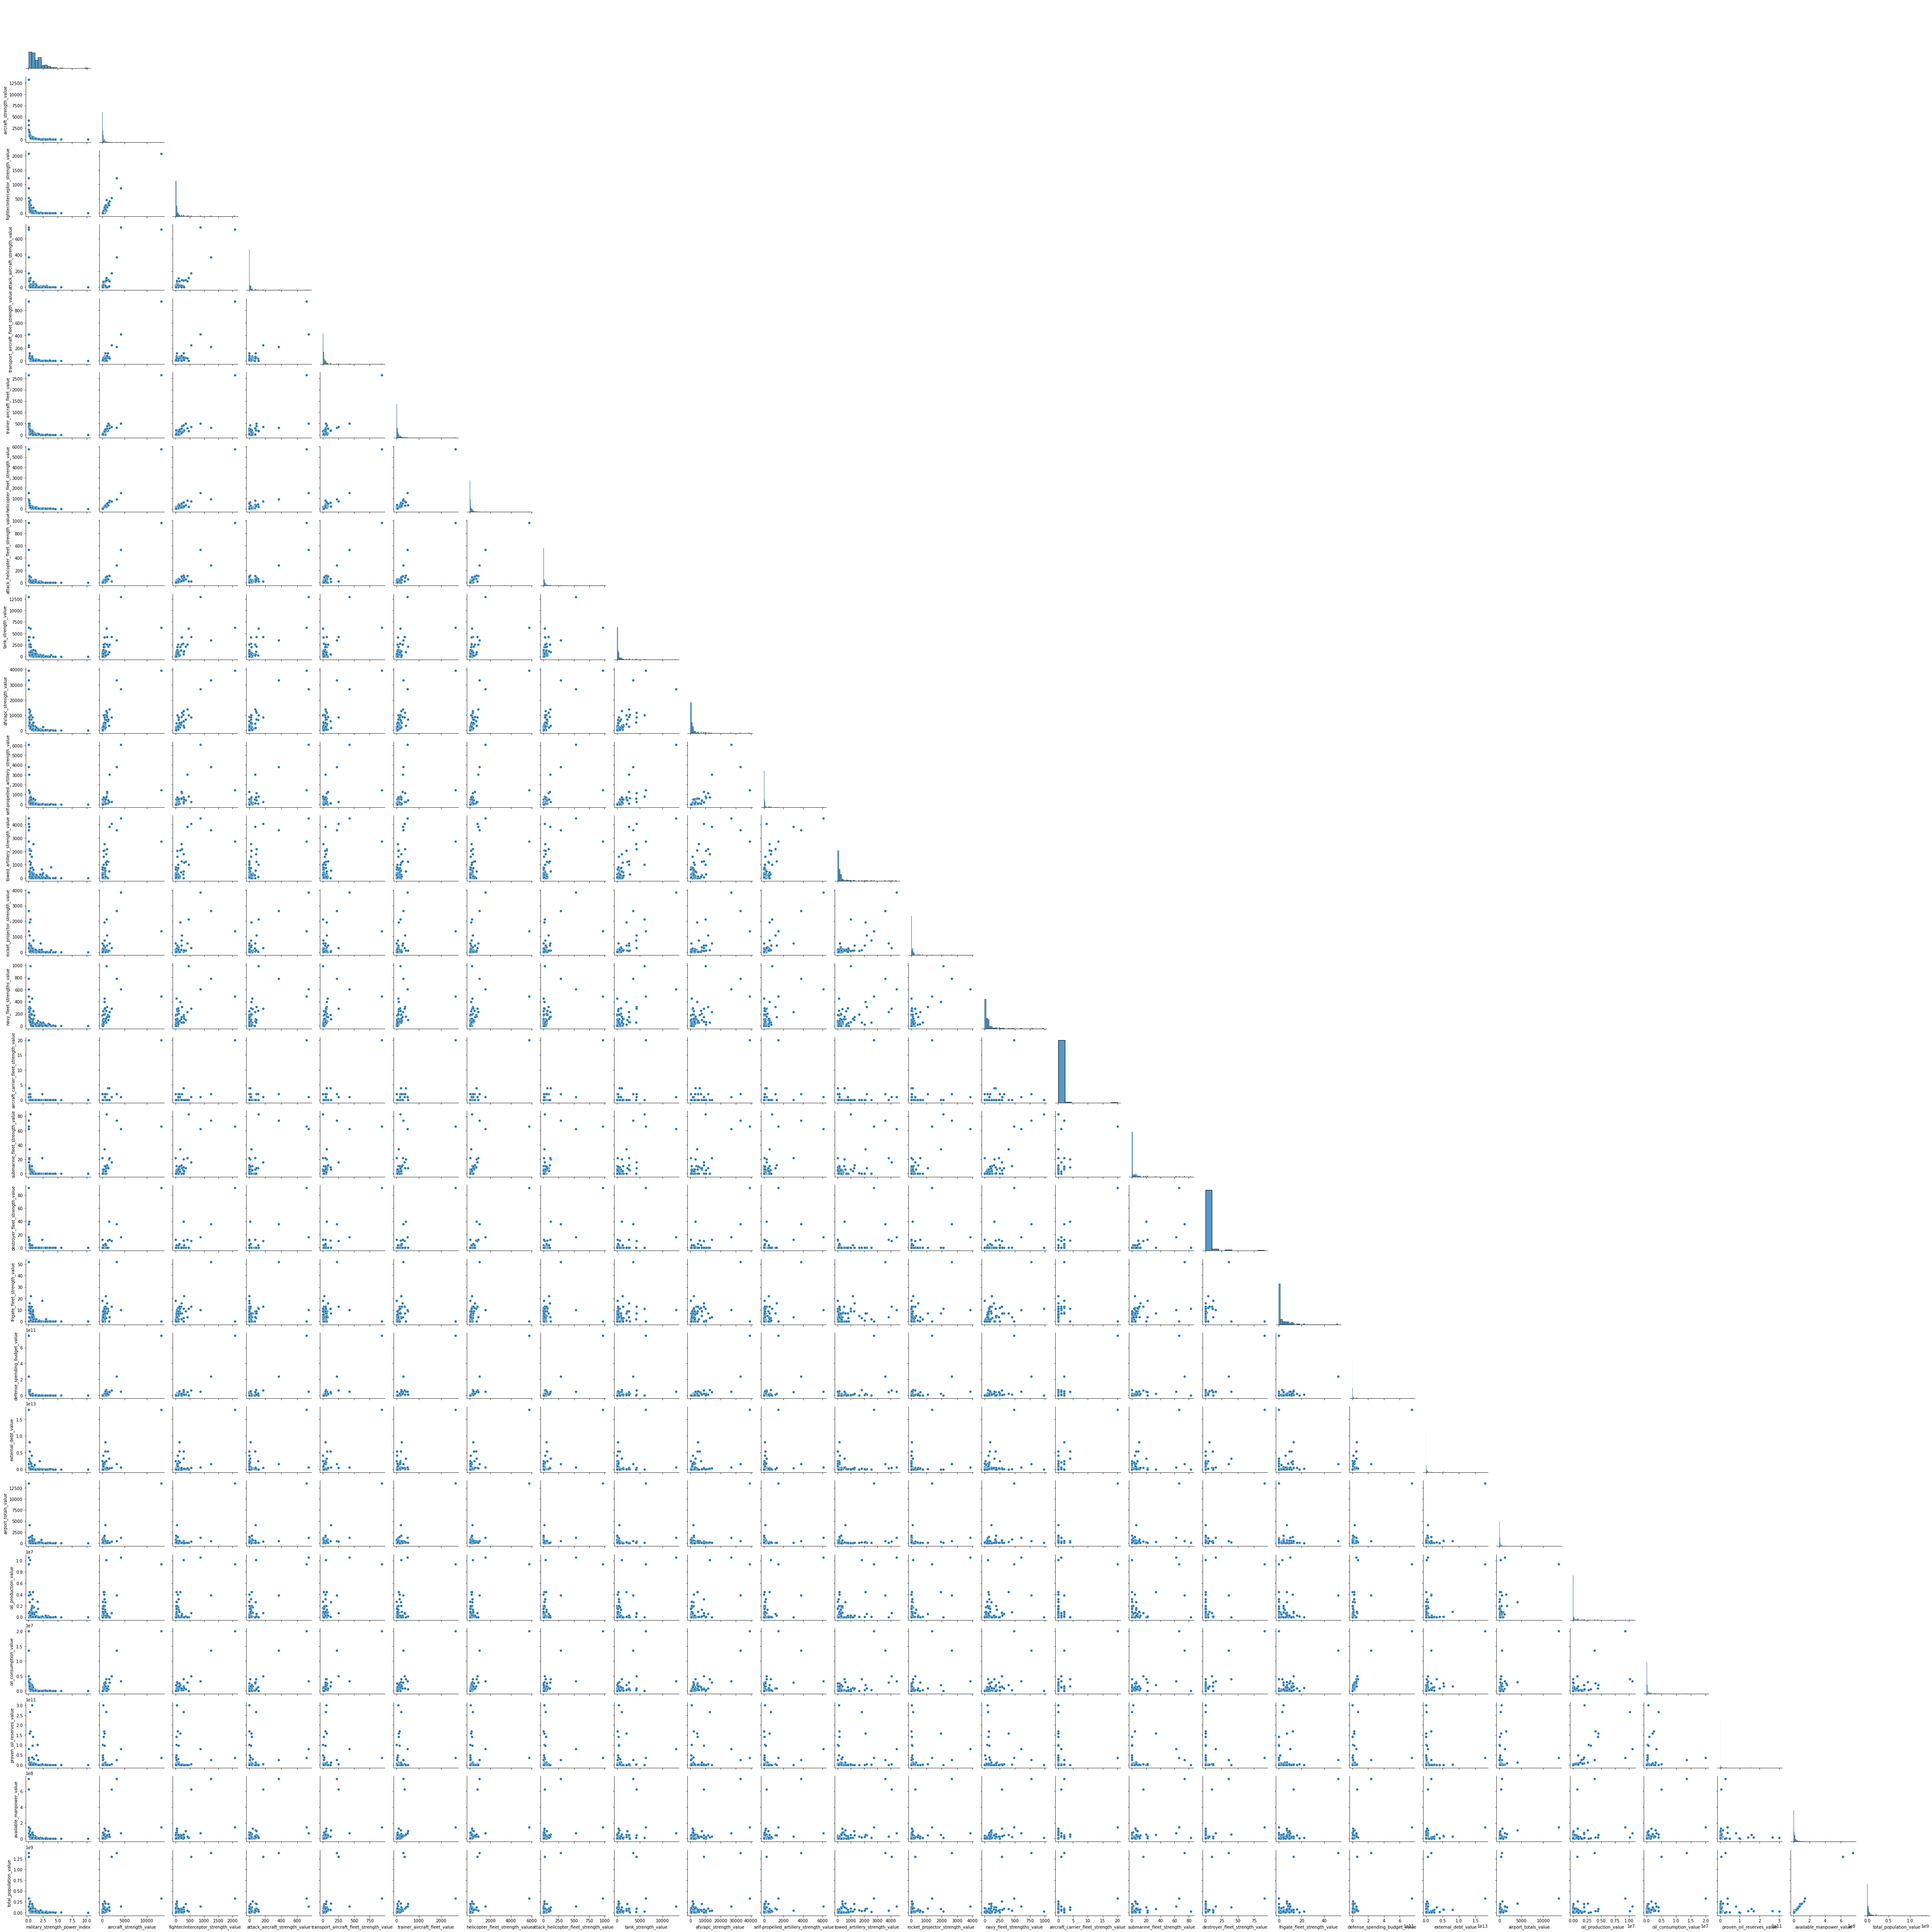

In [49]:
sns.pairplot(df, palette="inferno", corner=True);

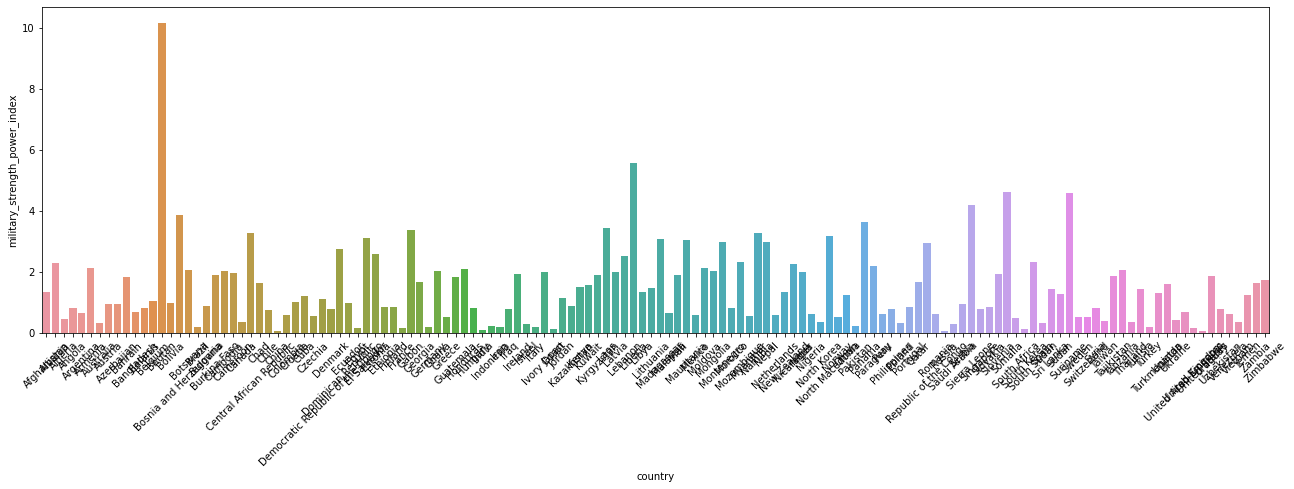

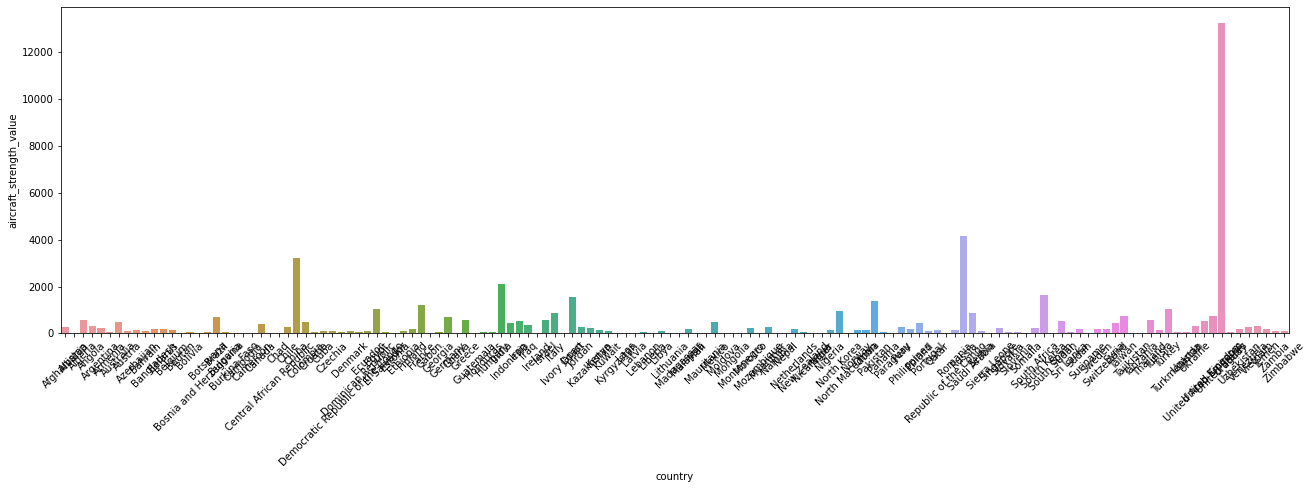

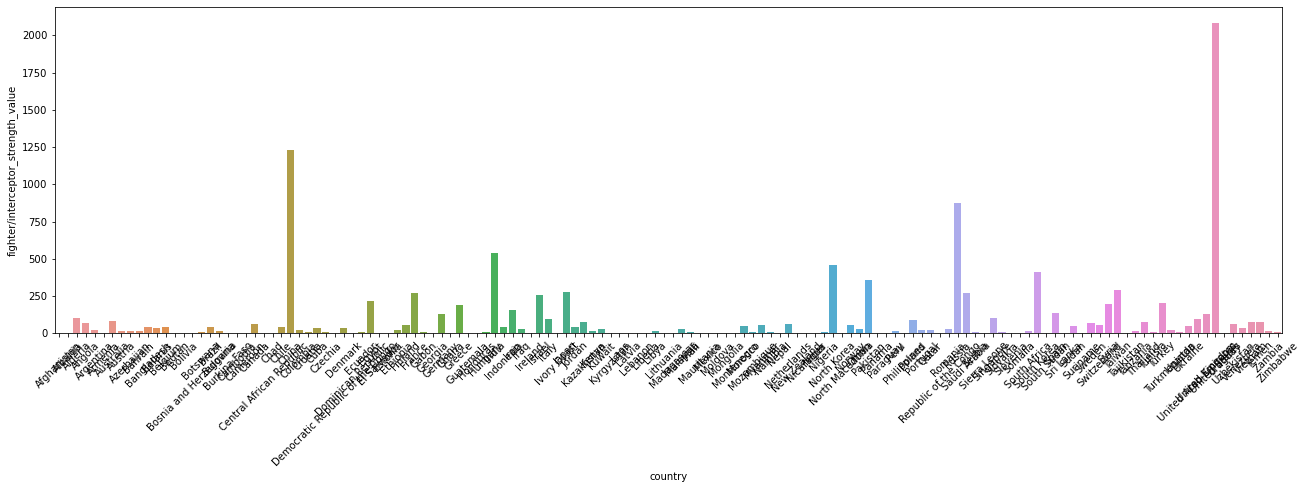

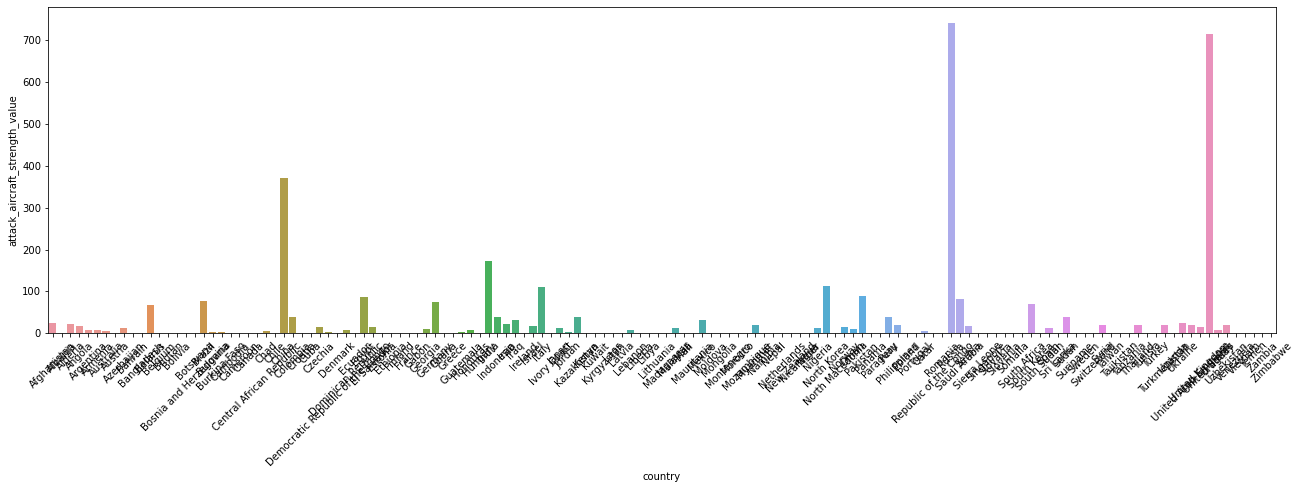

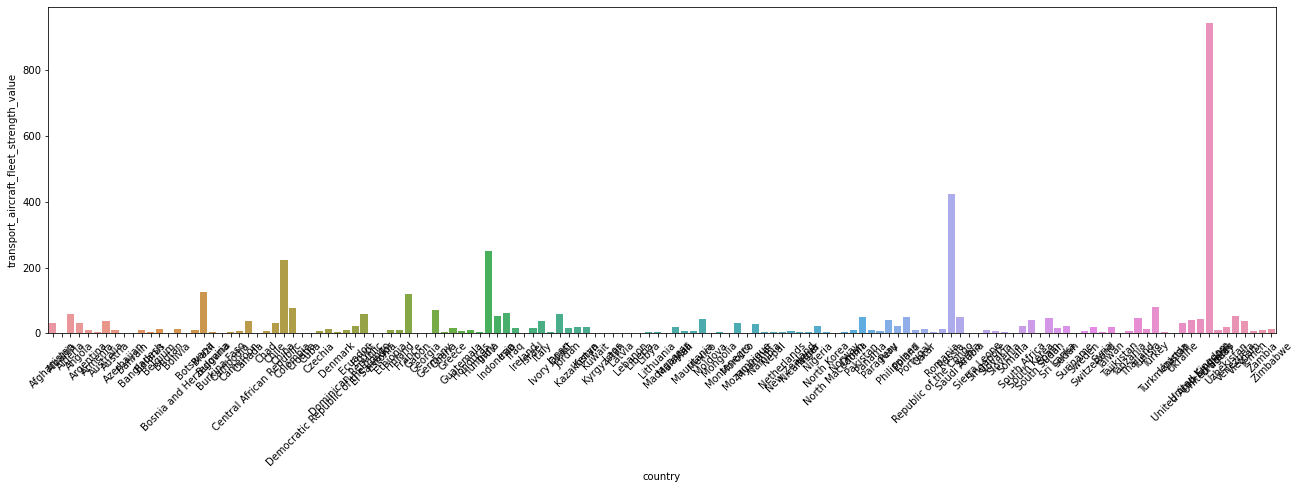

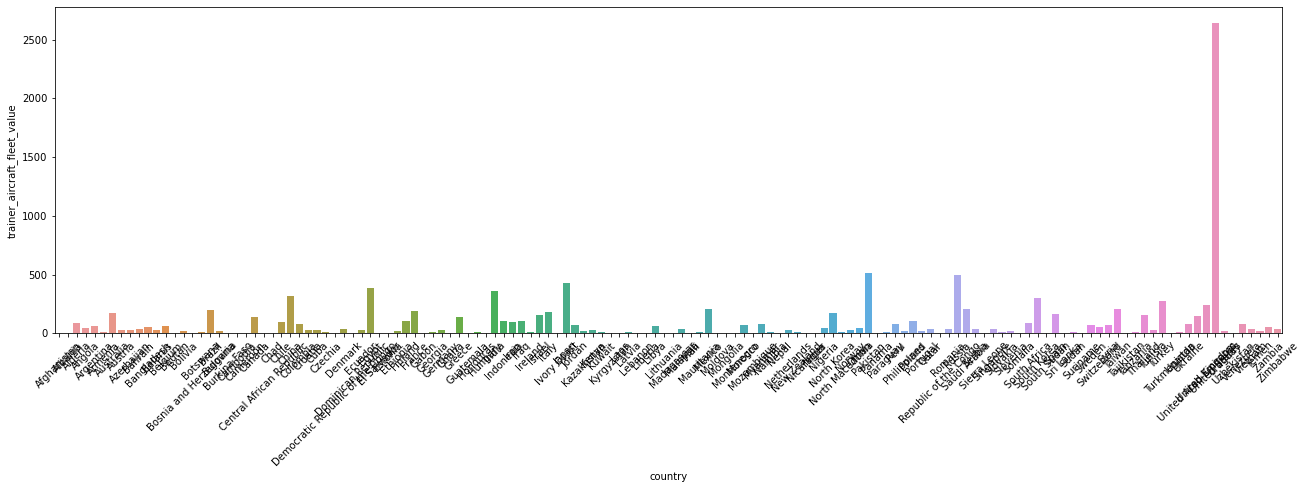

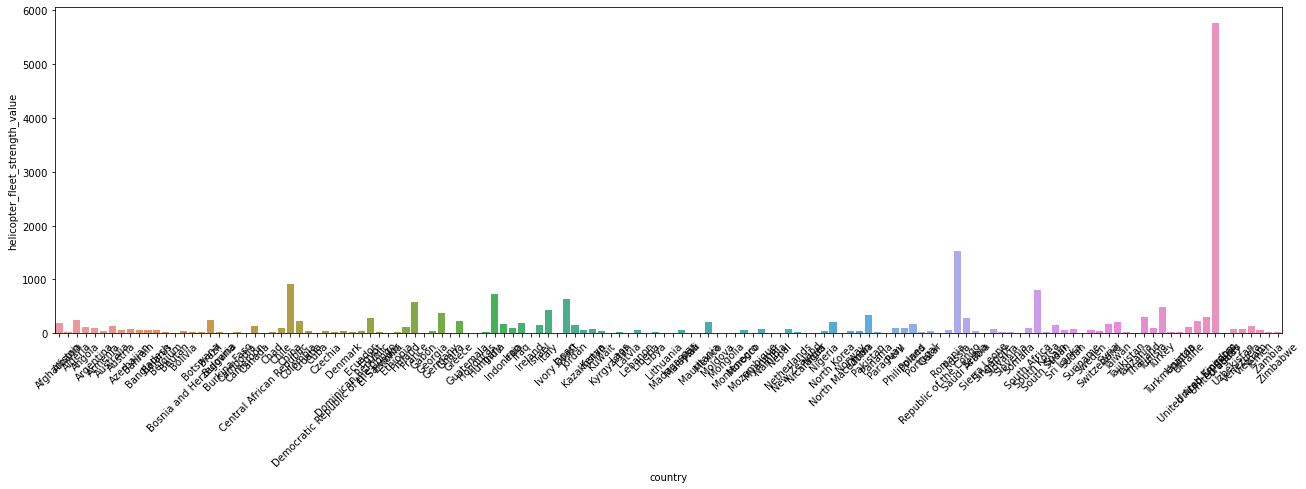

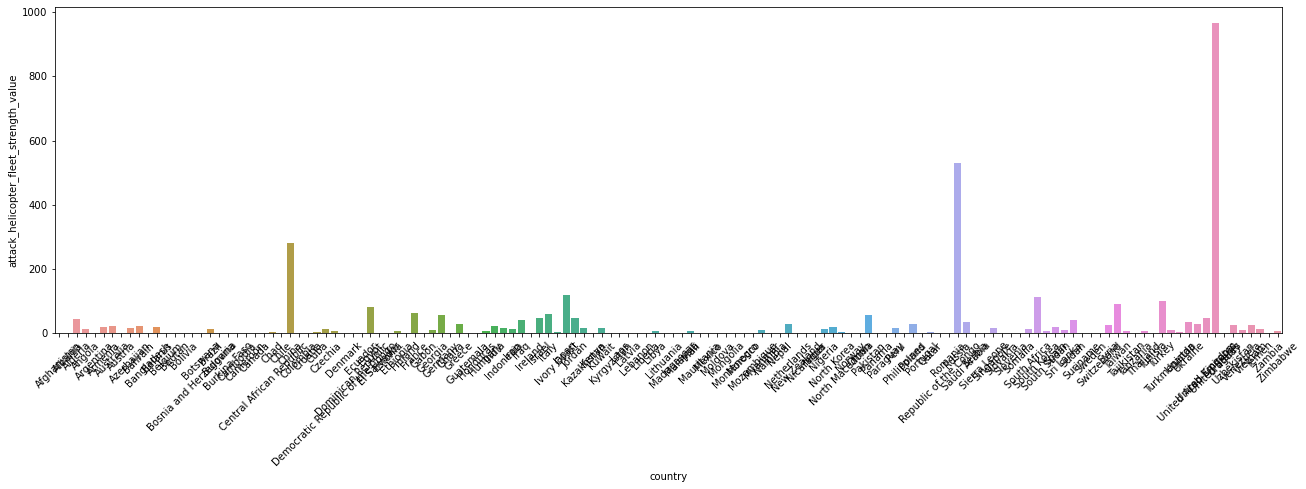

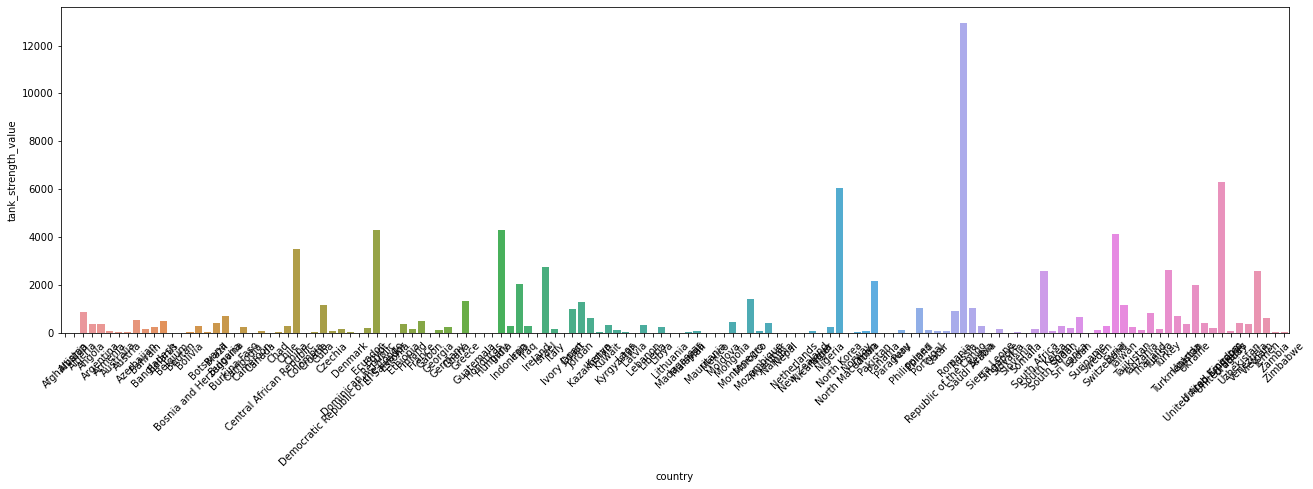

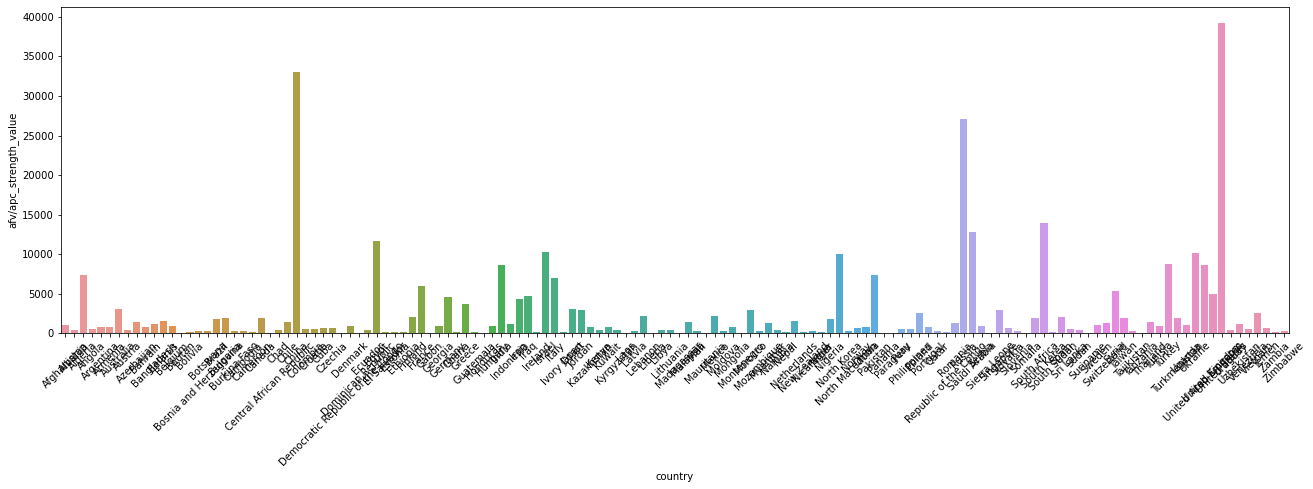

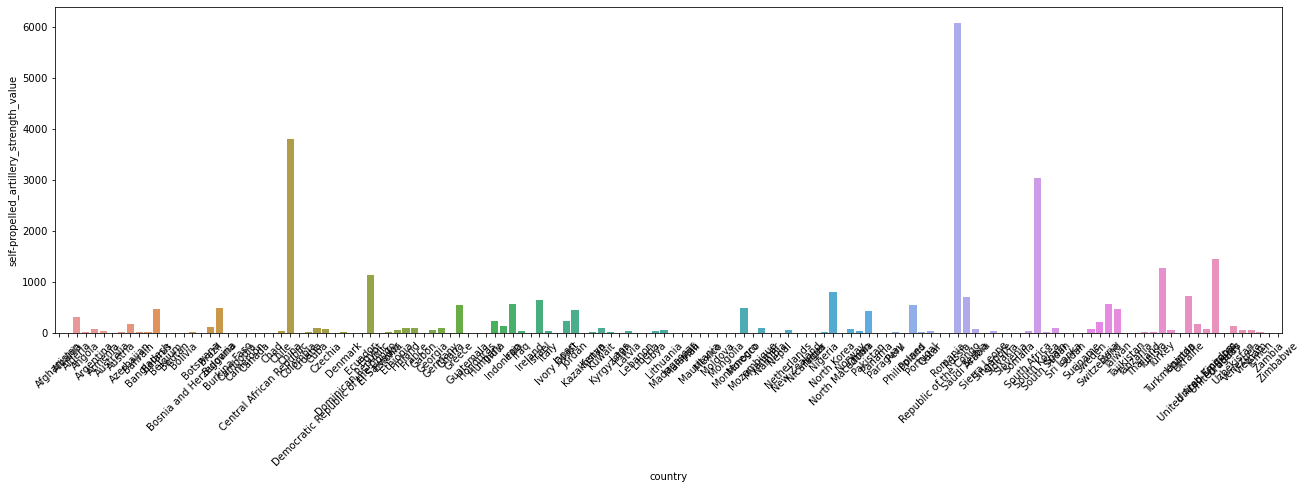

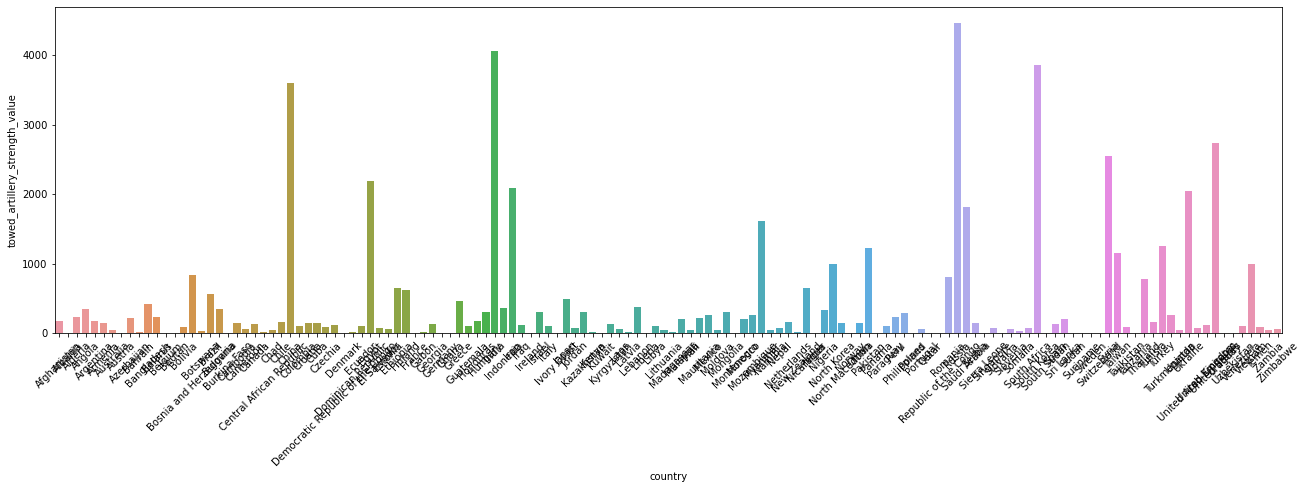

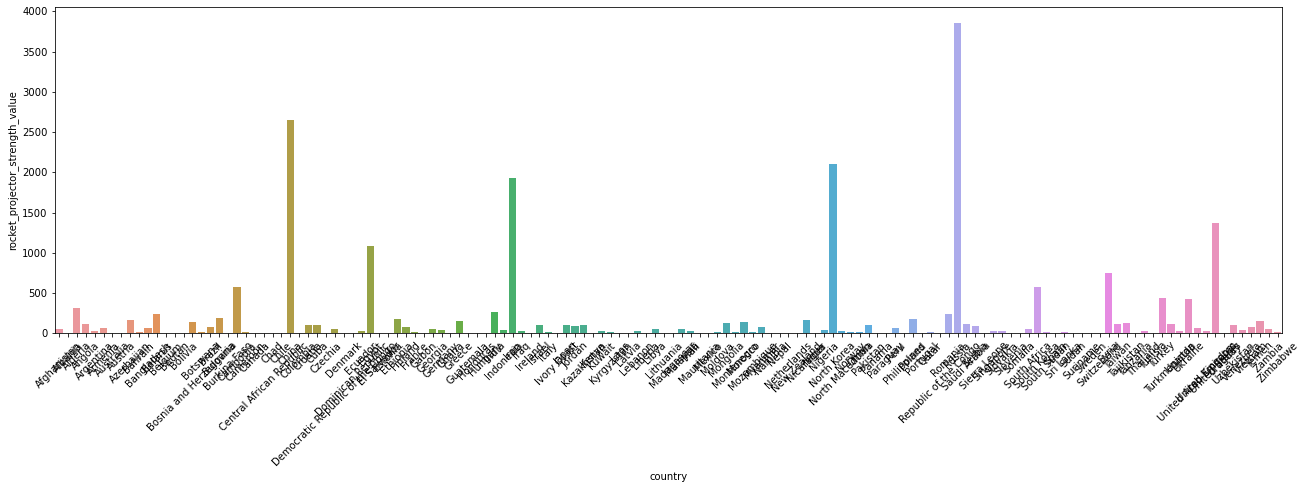

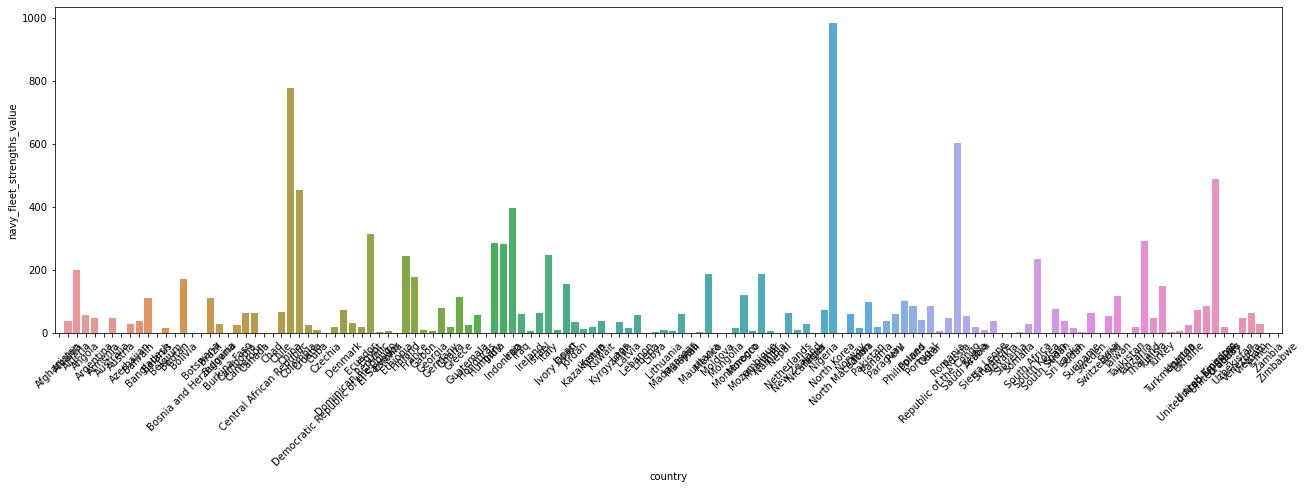

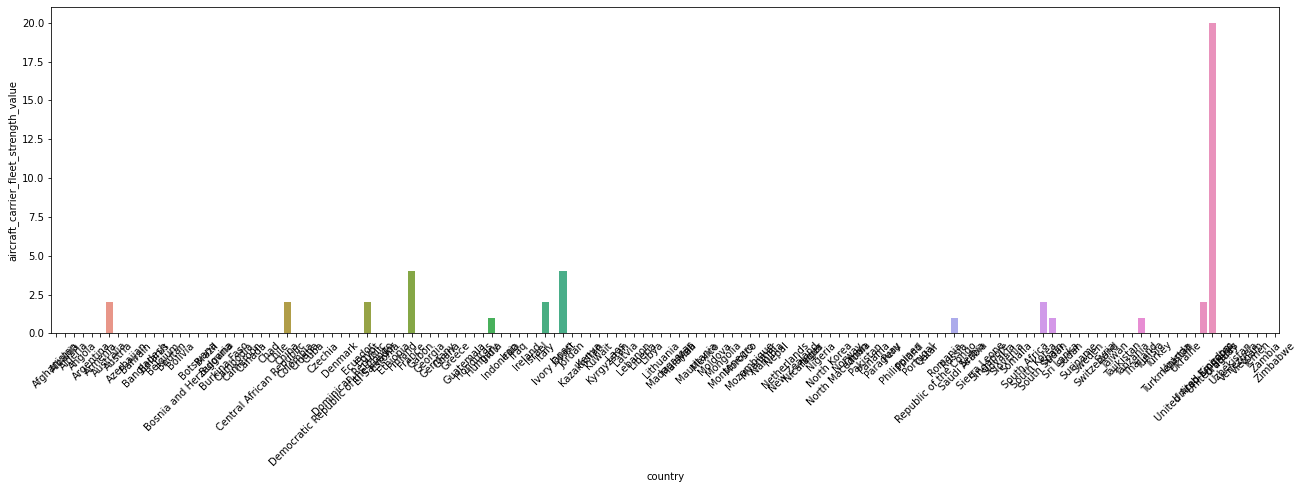

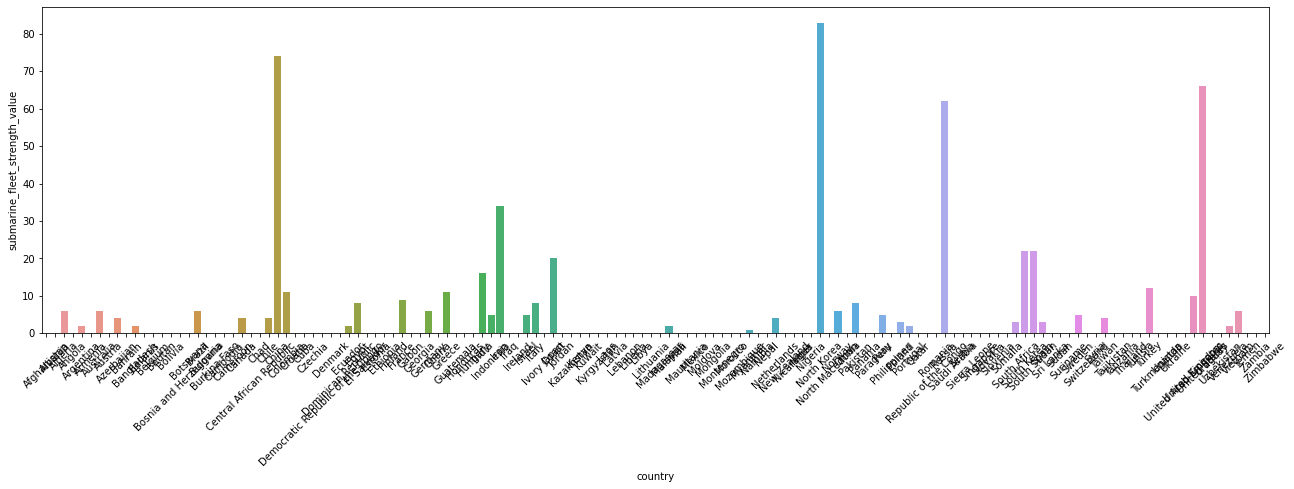

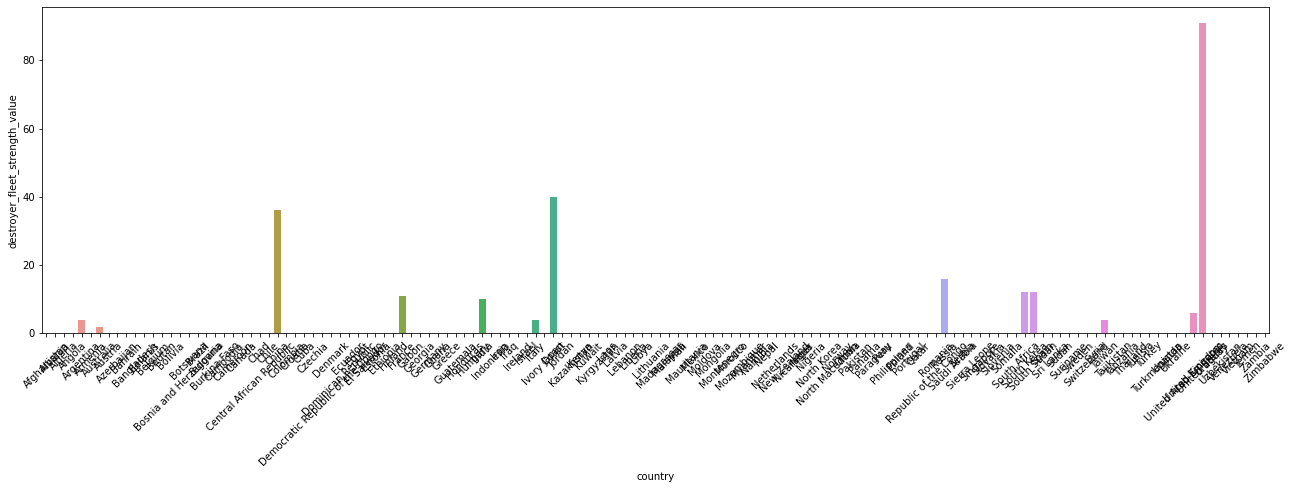

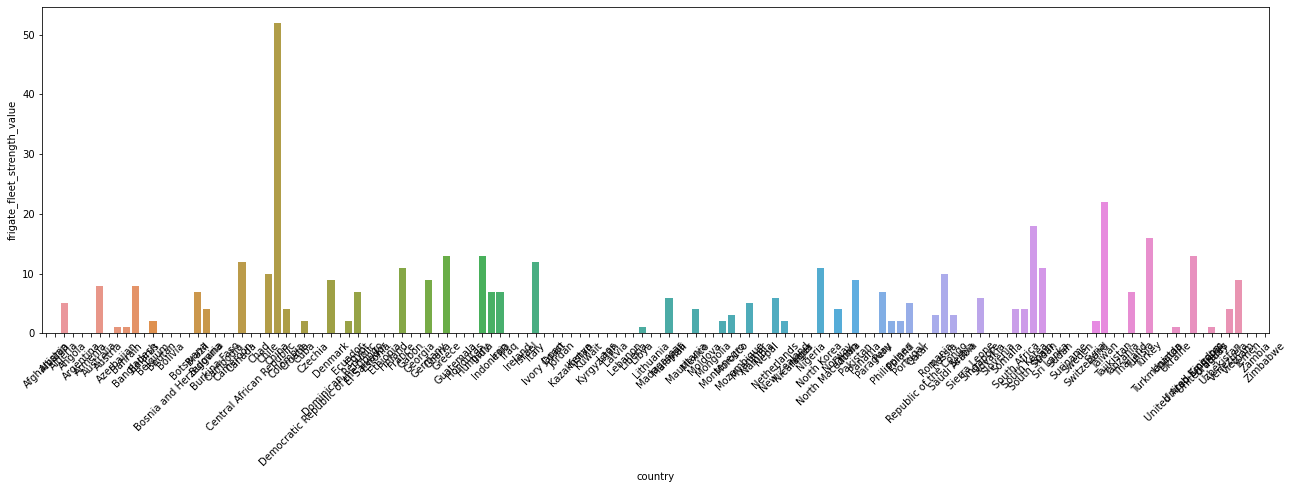

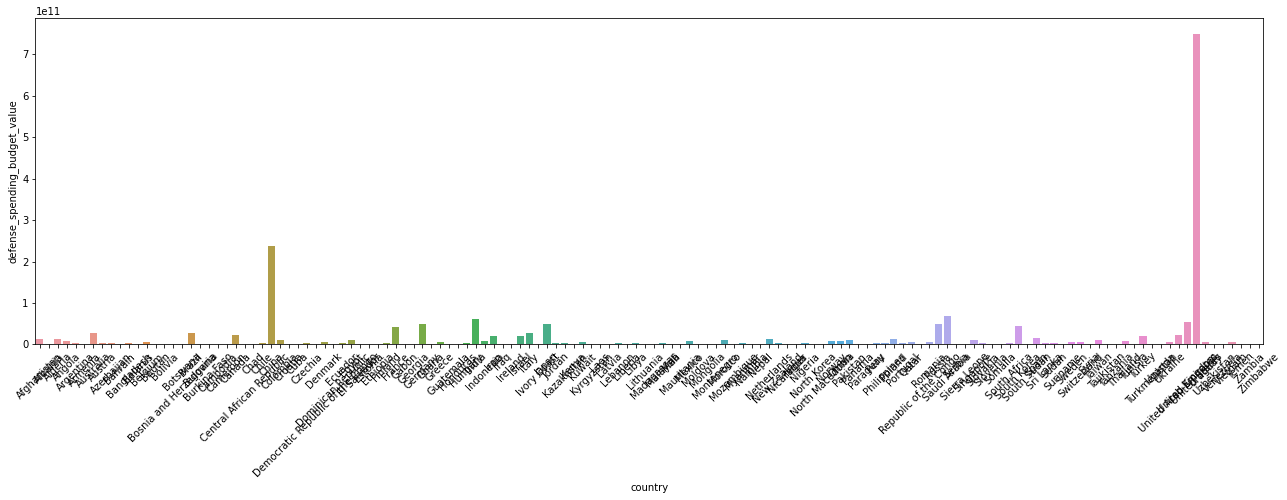

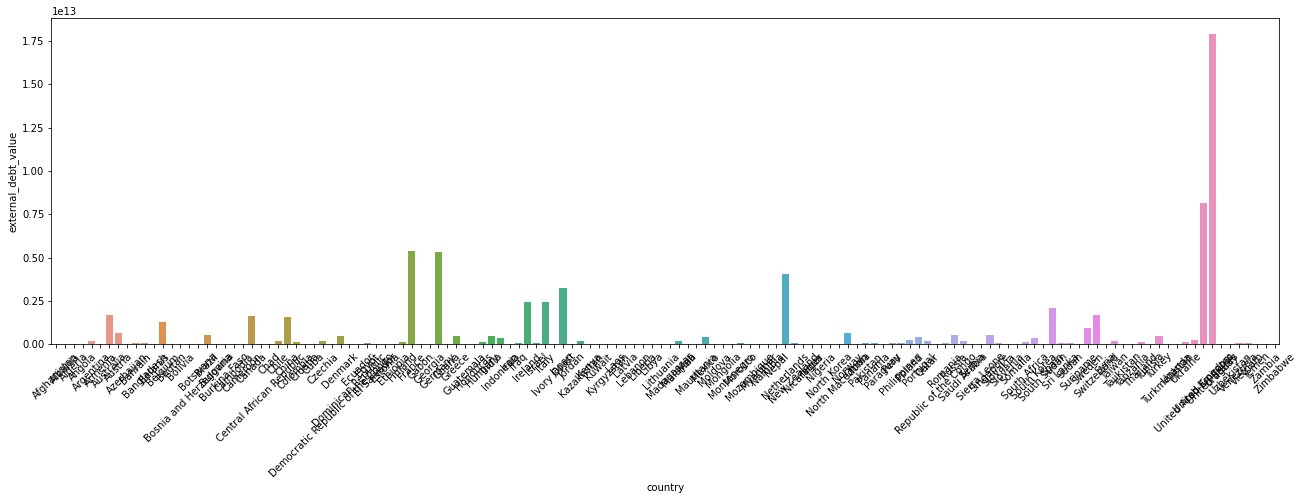

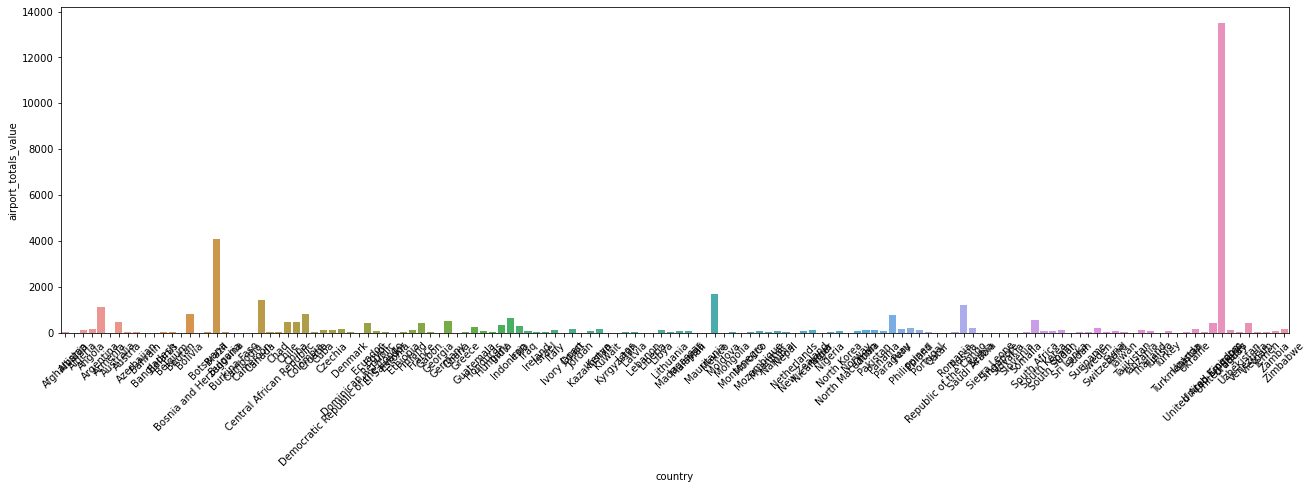

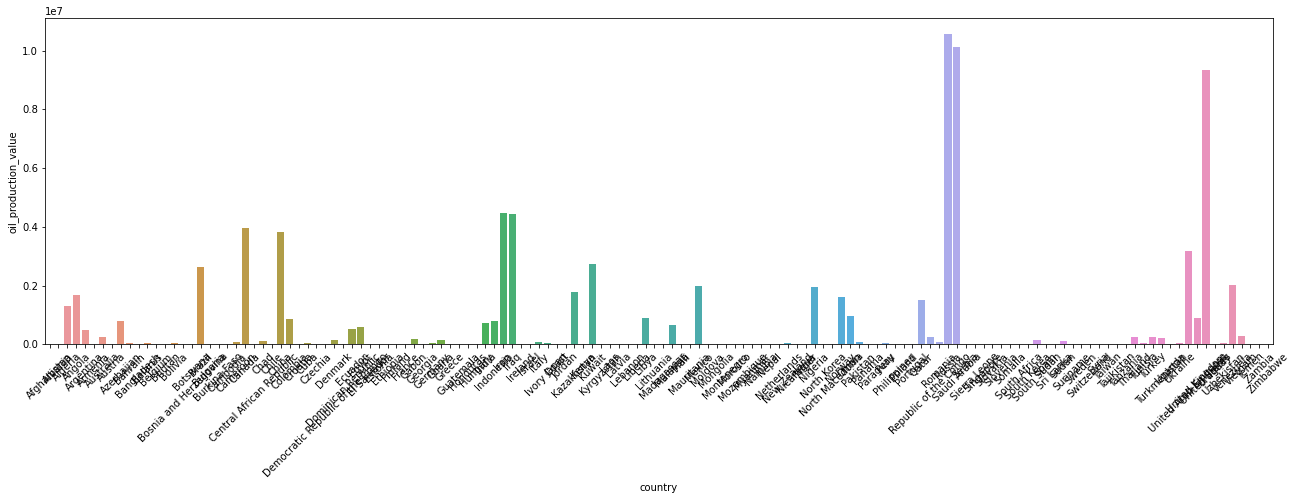

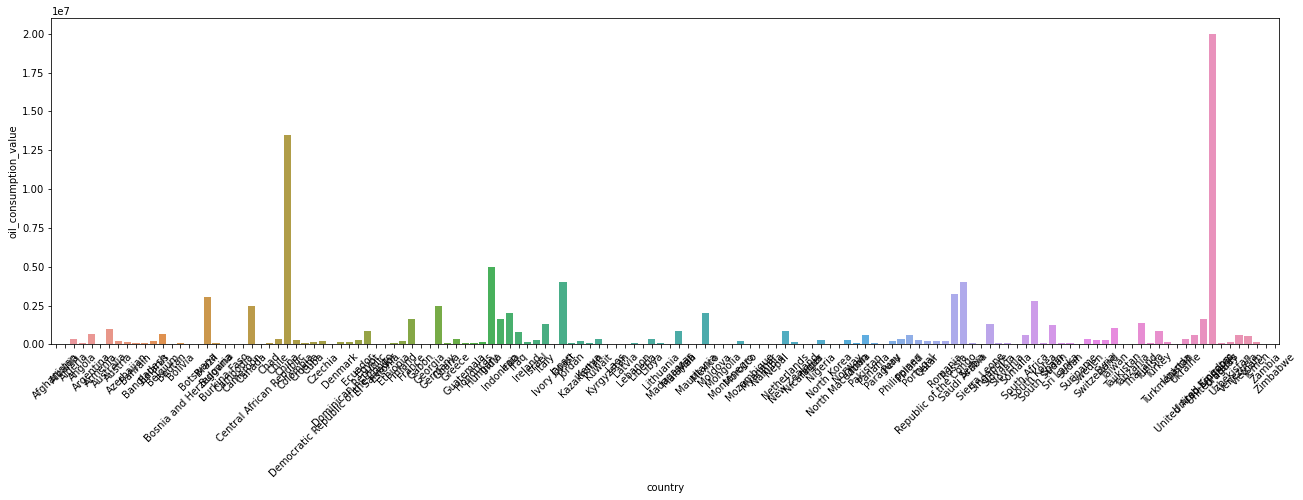

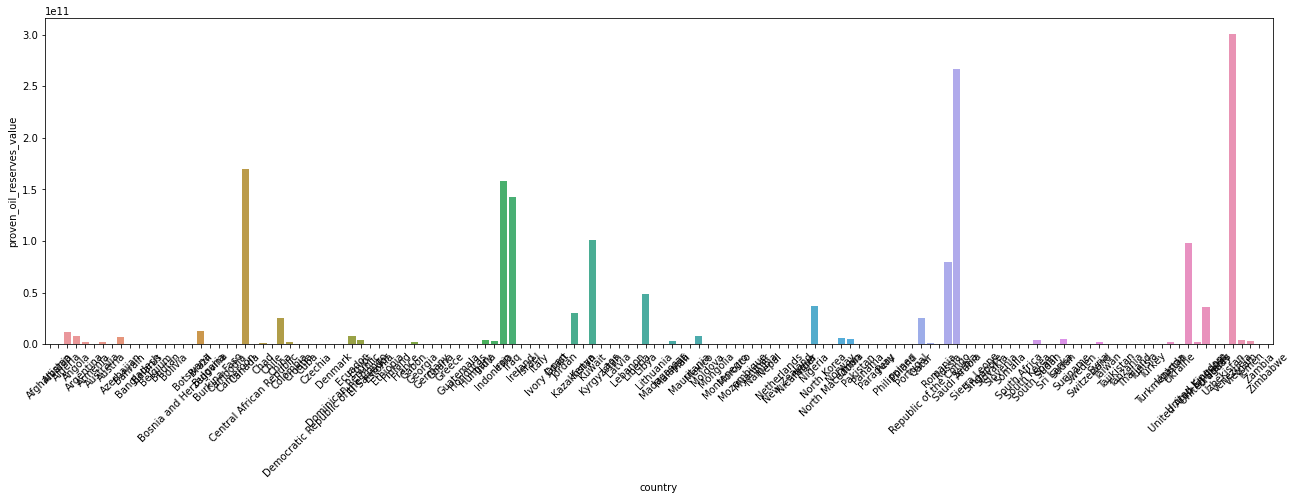

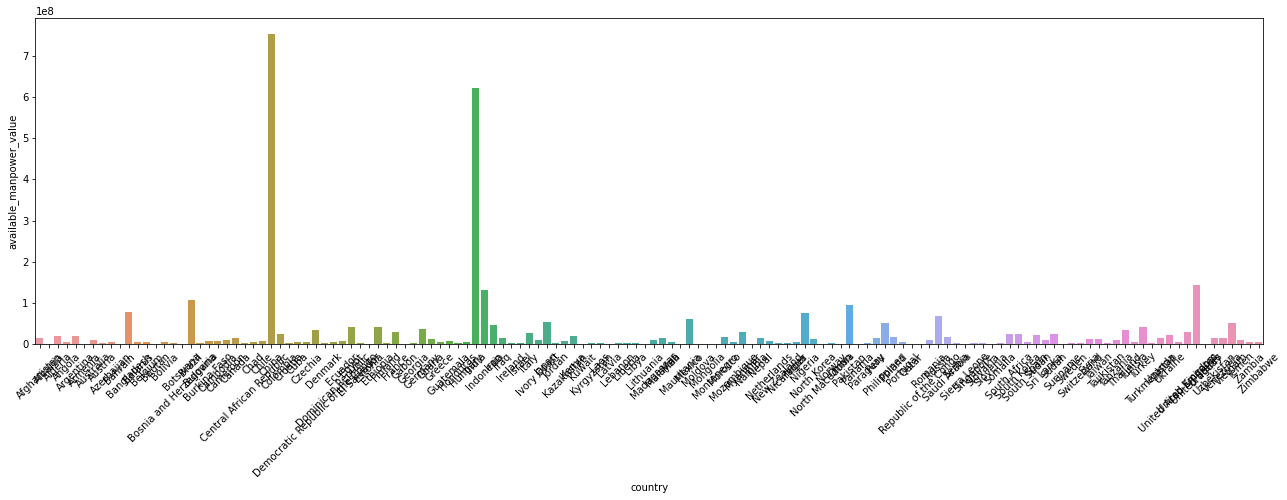

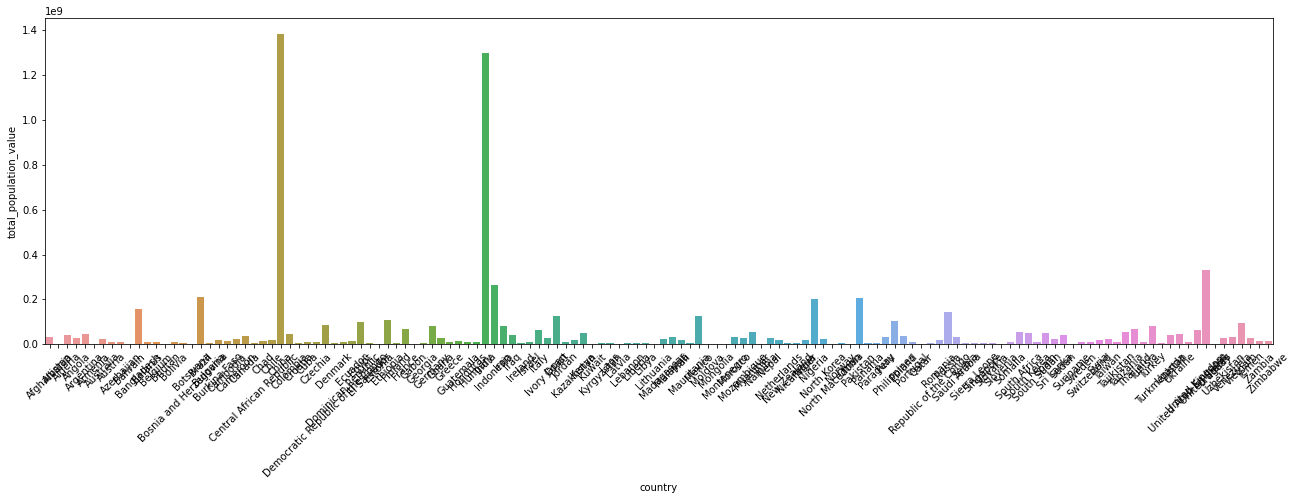

In [50]:
for col in df.columns:
    plt.figure(figsize = (22,6))
    sns.barplot(y = df[col], x = df.index, data = df)
    plt.xticks(rotation = 45);

## Decriptive statistics

In [51]:
df.describe().T

count             mean  \
military_strength_power_index           138.000            1.461   
aircraft_strength_value                 138.000          388.471   
fighter/interceptor_strength_value      138.000           81.565   
attack_aircraft_strength_value          138.000           25.761   
transport_aircraft_fleet_strength_value 138.000           30.232   
trainer_aircraft_fleet_value            138.000           82.833   
helicopter_fleet_strength_value         138.000          154.065   
attack_helicopter_fleet_strength_value  138.000           25.623   
tank_strength_value                     138.000          646.565   
afv/apc_strength_value                  138.000         2485.696   
self-propelled_artillery_strength_value 138.000          212.159   
towed_artillery_strength_value          138.000          393.978   
rocket_projector_strength_value         138.000          156.935   
navy_fleet_strengths_value              138.000           76.362   
aircraft_carrier_fleet_strength_value   138.000            0.319   
submarine_fleet_strength_value          138.000            4.159   
destroyer_fleet_strength_value          138.000            1.797   
frigate_fleet_strength_value            138.000            2.964   
defense_spending_budget_value           138.000  13993631641.210   
external_debt_value                     138.000 519498263043.478   
airport_totals_value                    138.000          290.043   
oil_production_value                    138.000       585552.355   
oil_consumption_value                   138.000       702018.696   
proven_oil_reserves_value               138.000  11944118420.290   
available_manpower_value                138.000     25442969.935   
total_population_value                  138.000     53180584.652   

                                                      std           min  \
military_strength_power_index                       1.324         0.061   
aircraft_strength_value                          1231.982         0.000   
fighter/interceptor_strength_value                230.325         0.000   
attack_aircraft_strength_value                     94.528         0.000   
transport_aircraft_fleet_strength_value            92.330         0.000   
trainer_aircraft_fleet_value                      240.804         0.000   
helicopter_fleet_strength_value                   520.184         0.000   
attack_helicopter_fleet_strength_value             97.326         0.000   
tank_strength_value                              1515.464         0.000   
afv/apc_strength_value                           5410.546         0.000   
self-propelled_artillery_strength_value           688.029         0.000   
towed_artillery_strength_value                    805.782         0.000   
rocket_projector_strength_value                   484.381         0.000   
navy_fleet_strengths_value                        140.822         0.000   
aircraft_carrier_fleet_strength_value               1.804         0.000   
submarine_fleet_strength_value                     12.719         0.000   
destroyer_fleet_strength_value                      9.195         0.000   
frigate_fleet_strength_value                        6.053         0.000   
defense_spending_budget_value             67311892724.125  13000000.000   
external_debt_value                     1847251527661.875 539400000.000   
airport_totals_value                             1212.967         2.000   
oil_production_value                          1667138.897         0.000   
oil_consumption_value                         2168810.056      2000.000   
proven_oil_reserves_value                 42750903273.129         0.000   
available_manpower_value                     84506975.276    132740.000   
total_population_value                      165108987.399    597927.000   

                                                   25%             50%  \
military_strength_power_index                    0.575           1.034   
aircraft_strength_value        

# Data Preprocessing

In [53]:
df.head()

military_strength_power_index  aircraft_strength_value  \
country                                                               
Afghanistan                          1.344                      260   
Albania                              2.314                       19   
Algeria                              0.466                      551   
Angola                               0.838                      295   
Argentina                            0.652                      227   

             fighter/interceptor_strength_value  \
country                                           
Afghanistan                                   0   
Albania                                       0   
Algeria                                     103   
Angola                                       72   
Argentina                                    24   

             attack_aircraft_strength_value  \
country                                       
Afghanistan                              25   
Albania                                   0   
Algeria                                  22   
Angola                                   18   
Argentina                                 7   

             transport_aircraft_fleet_strength_value  \
country                                                
Afghanistan                                       30   
Albania                                            0   
Algeria                                           59   
Angola                                            30   
Argentina                                          9   

             trainer_aircraft_fleet_value  helicopter_fleet_strength_value  \
country                                                                      
Afghanistan                             0                              187   
Albania                                 0                               19   
Algeria                                87                              257   
Angola                                 47                              126   
Argentina                              64                              100   

             attack_helicopter_fleet_strength_value  tank_strength_value  \
country                                                                    
Afghanistan                                       0                    0   
Albania                                           0                    0   
Algeria                                          45                  880   
Angola                                           15                  379   
Argentina                                         0                  370   

             afv/apc_strength_value  self-propelled_artillery_strength_value  \
country                                                                        
Afghanistan                    1062                                        0   
Albania                         467                                        0   
Algeria                        7361                                      320   
Angola                          595                                       28   
Argentina                       739                                       83   

             towed_artillery_strength_value  rocket_projector_strength_value  \
country                                                                        
Afghanistan                             176                               50   
Albania                                   0                                0   
Algeria                                 240                              316   
Angola                                  357                              115   
Argentina                               172                               26   

             navy_fleet_strengths_value  \
country                                   
Afghanistan                       0.000   
Albania                          38.000   
Algeria                         201.000   
Angola           

In [54]:
df.reset_index(inplace=True)

In [55]:
df.head()

country  military_strength_power_index  aircraft_strength_value  \
0  Afghanistan                          1.344                      260   
1      Albania                          2.314                       19   
2      Algeria                          0.466                      551   
3       Angola                          0.838                      295   
4    Argentina                          0.652                      227   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                                   0                              25   
1                                   0                               0   
2                                 103                              22   
3                                  72                              18   
4                                  24                               7   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                       30                             0   
1                                        0                             0   
2                                       59                            87   
3                                       30                            47   
4                                        9                            64   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                              187                                       0   
1                               19                                       0   
2                              257                                      45   
3                              126                                      15   
4                              100                                       0   

   tank_strength_value  afv/apc_strength_value  \
0                    0                    1062   
1                    0                     467   
2                  880                    7361   
3                  379                     595   
4                  370                     739   

   self-propelled_artillery_strength_value  towed_artillery_strength_value  \
0                                        0                             176   
1                                        0                               0   
2                                      320                             240   
3                                       28                             357   
4                                       83                             172   

   rocket_projector_strength_value  navy_fleet_strengths_value  \
0                               50                       0.000   
1                                0                      38.000   
2                              316                     201.000   
3                              115                      57.000   
4                               26                      49.000   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                  0.000                           0.000   
1                                  0.000                           0.000   
2                                  0.000                           6.000   
3                                  0.000                           0.000   
4                                  0.000                           2.000   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                           0.000                         0.000   
1                           0.000                         0.000   
2                           0.000                         5.000   
3                           0.000                         0.000   
4                           4.000                         0.000   

   defense_spending_budget_value  external_debt_value  airport_totals_value  \
0                12000000000.000       2840000000.000                    43   
1           

In [56]:
X = df.drop(["country"], axis = 1)

In [58]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, scale

In [59]:
scaler = scale

In [60]:
X_scaled = pd.DataFrame(scaler(X))

In [61]:
X_scaled.head()

0      1      2      3      4      5      6      7      8      9   \
0 -0.088 -0.105 -0.355 -0.008 -0.003 -0.345  0.064 -0.264 -0.428 -0.264   
1  0.647 -0.301 -0.355 -0.274 -0.329 -0.345 -0.261 -0.264 -0.428 -0.374   
2 -0.754  0.132  0.093 -0.040  0.313  0.017  0.199  0.200  0.155  0.904   
3 -0.472 -0.076 -0.042 -0.082 -0.003 -0.149 -0.054 -0.110 -0.177 -0.351   
4 -0.613 -0.132 -0.251 -0.199 -0.231 -0.078 -0.104 -0.264 -0.183 -0.324   

      10     11     12     13     14     15     16     17     18     19  \
0 -0.309 -0.272 -0.222 -0.544 -0.177 -0.328 -0.196 -0.491 -0.030 -0.281   
1 -0.309 -0.491 -0.325 -0.273 -0.177 -0.328 -0.196 -0.491 -0.205 -0.277   
2  0.157 -0.192  0.330  0.888 -0.177  0.145 -0.196  0.338 -0.015 -0.279   
3 -0.269 -0.046 -0.087 -0.138 -0.177 -0.328 -0.196 -0.491 -0.104 -0.259   
4 -0.188 -0.276 -0.271 -0.195 -0.177 -0.170  0.240 -0.491 -0.146 -0.165   

      20     21     22     23     24     25  
0 -0.204 -0.353 -0.322 -0.280 -0.132 -0.111  
1 -0.237 -0.343 -0.305 -0.276 -0.284 -0.305  
2 -0.110  0.434 -0.174  0.006 -0.056 -0.070  
3 -0.094  0.650 -0.287 -0.086 -0.228 -0.139  
4  0.702 -0.064 -0.008 -0.229 -0.063 -0.052

In [62]:
X_scaled.shape

(138, 26)

# Modelling

In [63]:
from sklearn.cluster import KMeans

In [64]:
# With default value of n_clusters=8
K_means_model = KMeans(random_state = 101)

In [65]:
K_means_model.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 3, 6, 0, 0, 0, 0, 3, 0, 0, 0, 0, 6, 0, 0, 0, 0,
       3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 6, 0, 0, 0, 6, 6, 0, 0, 7, 0, 7, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0,
       0, 6, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 6, 0, 0, 0, 6, 0, 0, 0, 0,
       6, 0, 7, 0, 0, 0, 6, 3, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 4, 1, 0,
       0, 0, 0, 0, 0, 0])

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [79]:
from pyclustertend import hopkins

In [80]:
hopkins(X_scaled, X_scaled.shape[0])

0.07515085866919792

## Clustering with K-means

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

In [81]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X_scaled)
    ssd.append(model.inertia_)

In [82]:
ssd

[1913.4825726106826,
 1312.3964106007531,
 1043.441939669562,
 886.0892220085619,
 713.8713957396876,
 610.5294701127433,
 511.87139844261316,
 453.09301527395866]

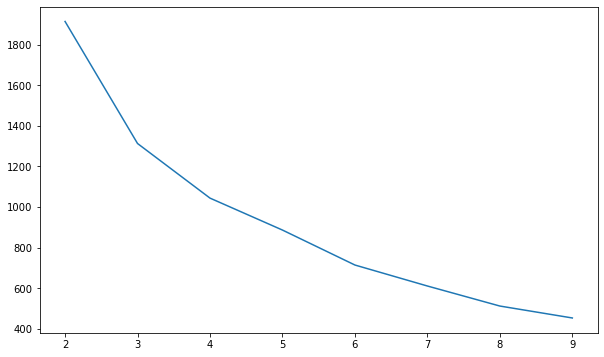

In [83]:
sns.lineplot(x=K, y = ssd,markers="x")

plt.show()

In [84]:
from yellowbrick.cluster import KElbowVisualizer

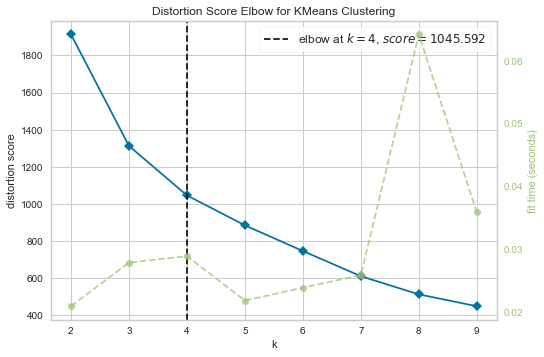

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [86]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(X_scaled)
visu.poof()

### Model Building and label visualisation

In [94]:
# With optimal K value
model = KMeans(n_clusters = 4, random_state = 101)
model.fit_predict(X_scaled)

array([3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3,
       0, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 0,
       3, 0, 3, 3, 3, 0, 0, 0, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 0, 3, 0, 2, 3,
       3, 3, 0, 3, 3, 3])

In [108]:
model.inertia_

1045.8678492319914

In [95]:
model.labels_

array([3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3,
       0, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 0,
       3, 0, 3, 3, 3, 0, 0, 0, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 0, 3, 0, 2, 3,
       3, 3, 0, 3, 3, 3])

In [109]:
df["cluster"] = model.labels_

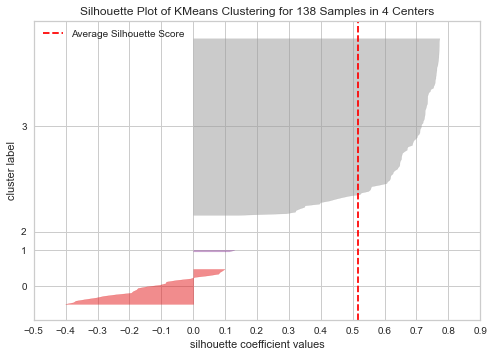

In [114]:
model = KMeans(n_clusters=4, random_state=101)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.poof();

In [115]:
df["cluster"].value_counts()

3    112
0     23
1      2
2      1
Name: cluster, dtype: int64

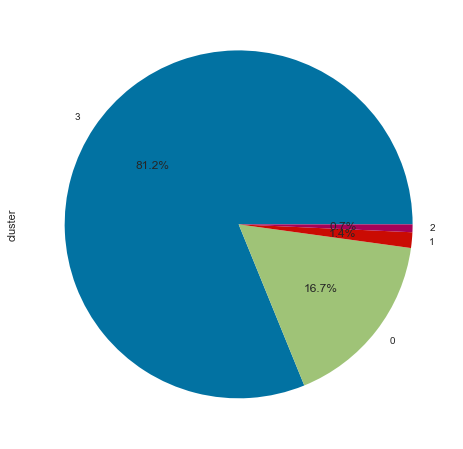

In [116]:
df["cluster"].value_counts().plot(kind="pie", startangle=0, labeldistance=1.1, autopct='%1.1f%%',figsize=(10, 8));

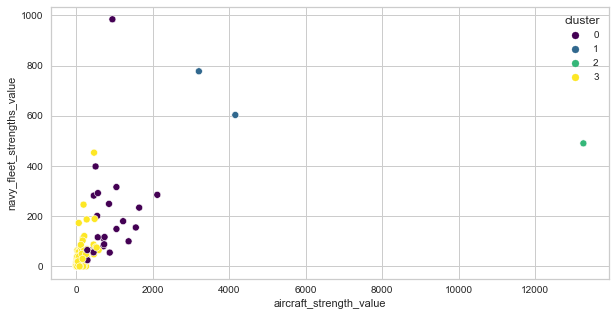

In [118]:
plt.figure(figsize=(10, 5))

sns.scatterplot(df["aircraft_strength_value"], 
                df["navy_fleet_strengths_value"], hue=df["cluster"], palette= "viridis");

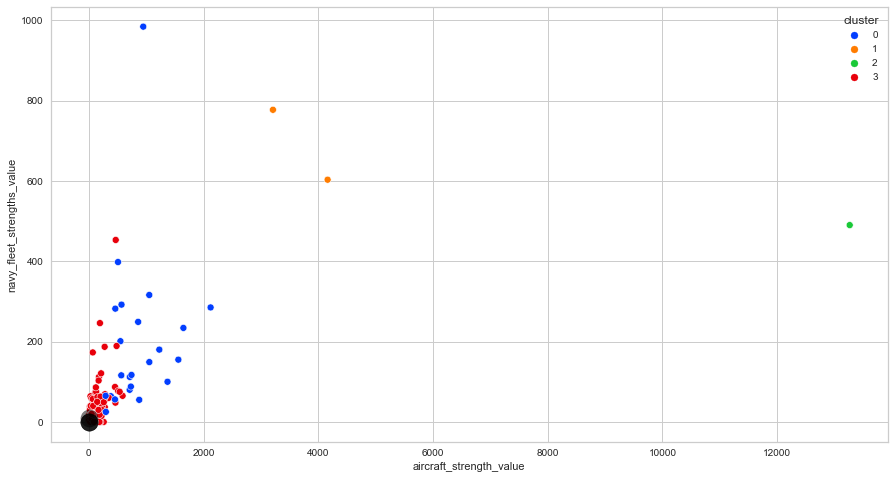

In [119]:
plt.figure(figsize=(15, 8))

sns.scatterplot(df["aircraft_strength_value"], 
                df["navy_fleet_strengths_value"], hue=df["cluster"], data=df["cluster"], palette="bright")

centers = model.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 14], c='black', s=300, alpha=0.5);

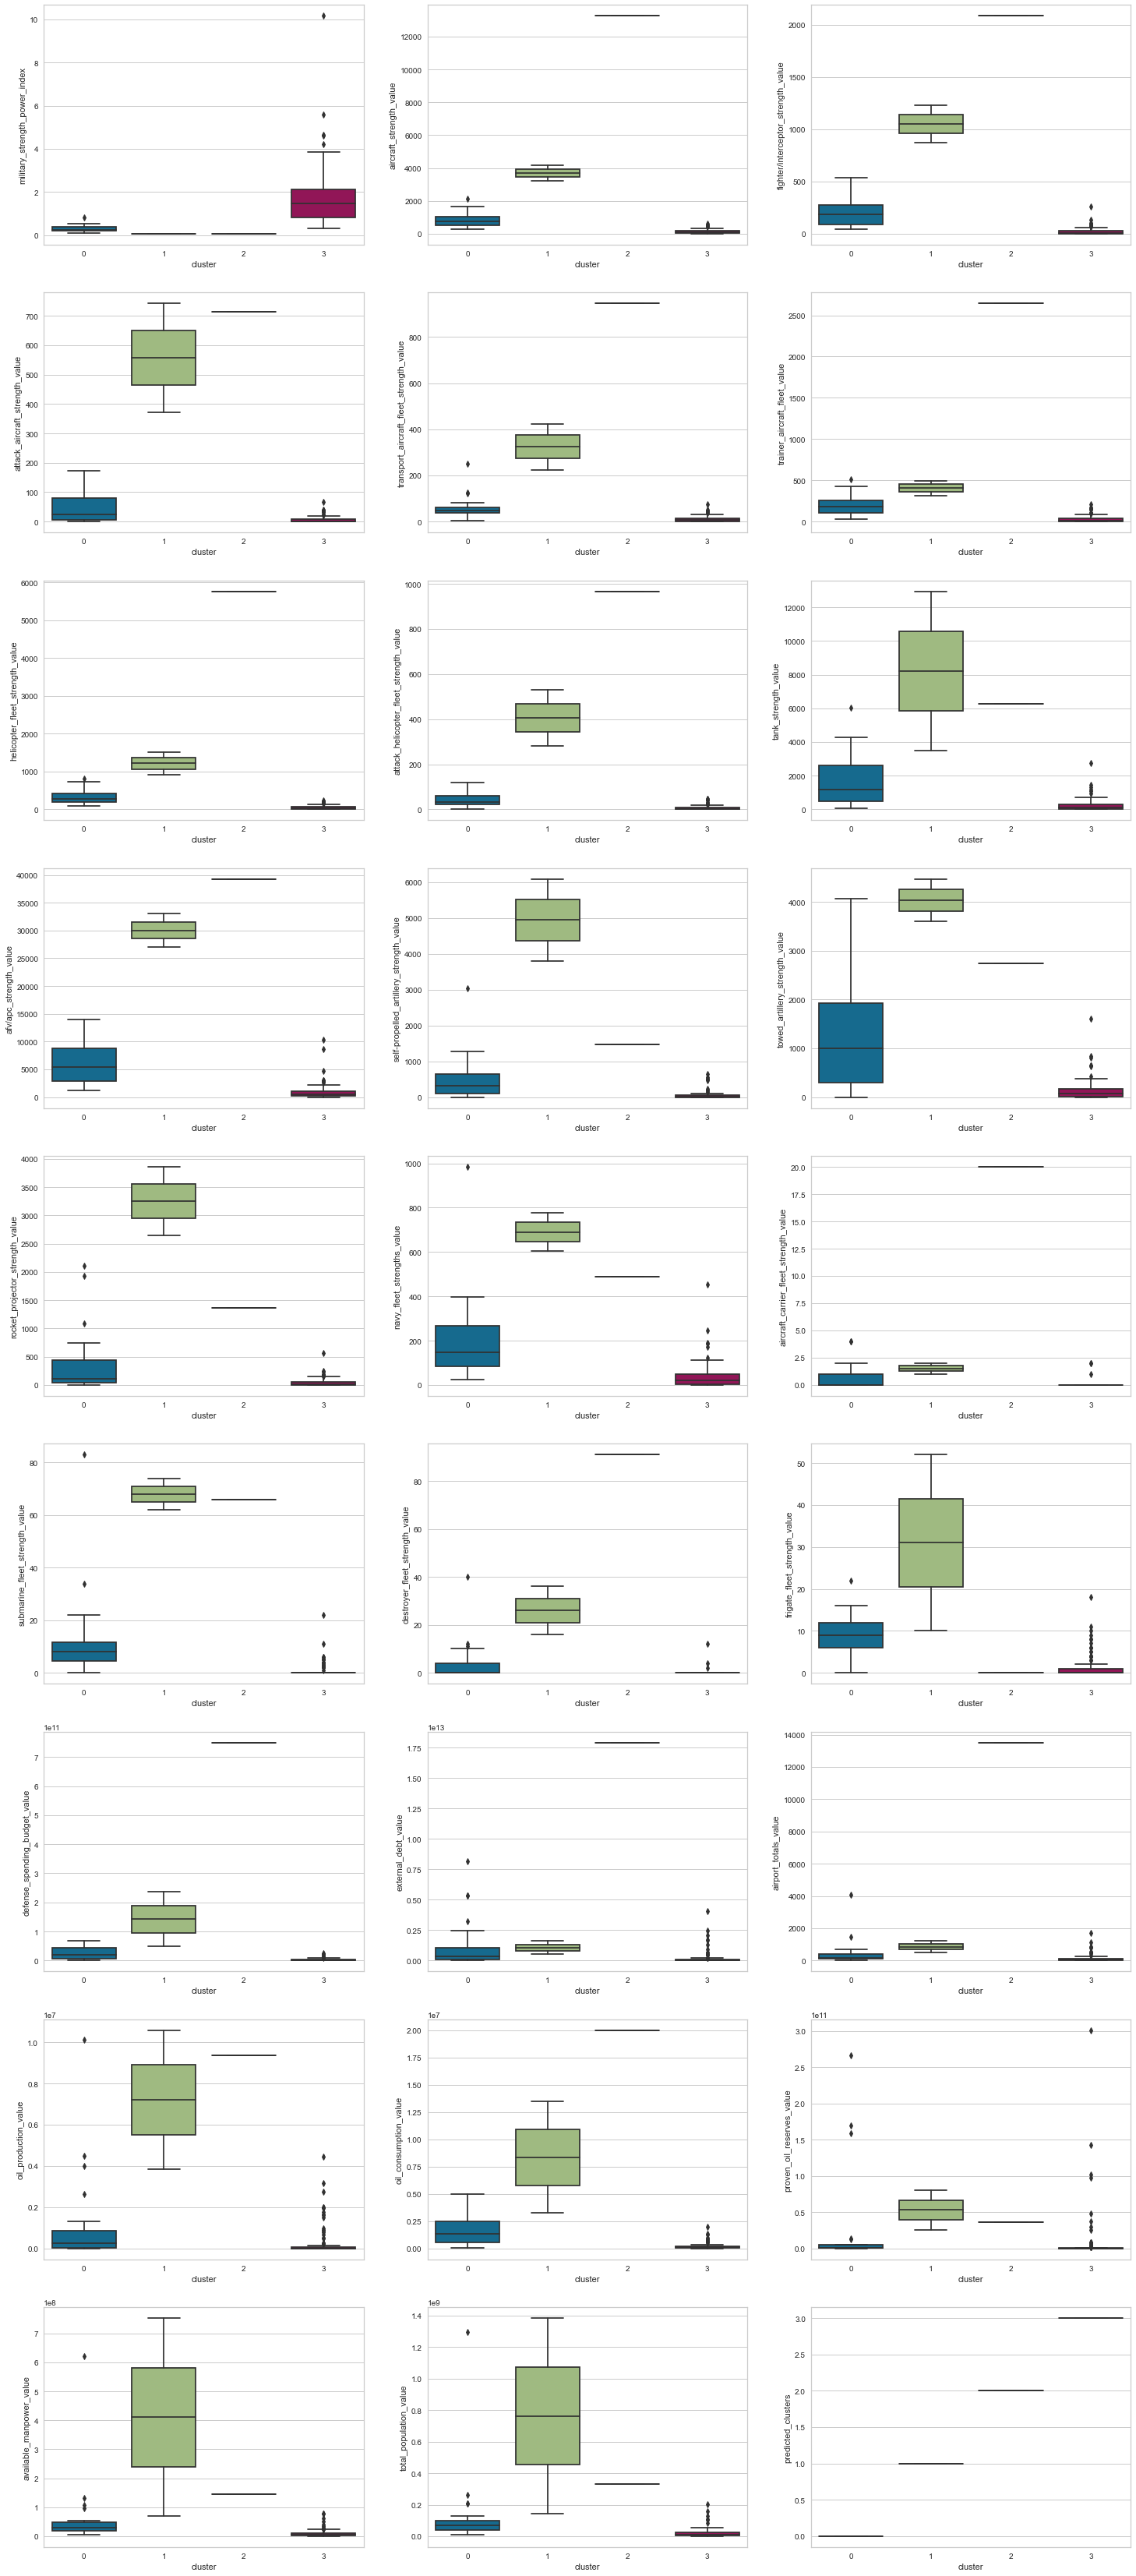

In [122]:
index = 0
plt.figure(figsize=(25, 60))

for feature in df.drop("country", axis=1):
    if feature != "cluster":
        index += 1
        plt.subplot(9, 3, index)
        sns.boxplot(x="cluster", y=feature, data=df)

In [125]:
df[df["cluster"] == 0][["country", "military_strength_power_index"]].sort_values(by="military_strength_power_index")

country  military_strength_power_index
49            India                          0.095
57            Japan                          0.150
110     South Korea                          0.151
40           France                          0.170
129  United Kingdom                          0.172
35            Egypt                          0.187
17           Brazil                          0.199
124          Turkey                          0.210
55            Italy                          0.211
43          Germany                          0.219
51             Iran                          0.219
91         Pakistan                          0.236
50        Indonesia                          0.254
102    Saudi Arabia                          0.303
134         Vietnam                          0.356
122        Thailand                          0.357
22           Canada                          0.371
87      North Korea                          0.372
119          Taiwan                          0.401
127         Ukraine                          0.446
2           Algeria                          0.466
45           Greece                          0.531
118           Syria                          0.824

In [126]:
df[df["cluster"] == 1][["country", "military_strength_power_index"]].sort_values(by="military_strength_power_index")

country  military_strength_power_index
101  Russia                          0.068
26    China                          0.069

In [128]:
df[df["cluster"] == 2][["country", "military_strength_power_index"]].sort_values(by="military_strength_power_index")

country  military_strength_power_index
130  United States                          0.061

In [129]:
df[df["cluster"] == 3][["country", "military_strength_power_index"]].sort_values(by="military_strength_power_index")

country  military_strength_power_index
54                             Israel                          0.311
6                           Australia                          0.323
112                             Spain                          0.339
96                             Poland                          0.340
109                      South Africa                          0.498
117                       Switzerland                          0.526
89                             Norway                          0.528
116                            Sweden                          0.530
30                            Czechia                          0.553
79                            Myanmar                          0.569
82                        Netherlands                          0.592
27                           Colombia                          0.605
73                             Mexico                          0.607
100                           Romania                          0.618
94                               Peru                          0.622
133                         Venezuela                          0.645
86                            Nigeria                          0.648
4                           Argentina                          0.652
70                           Malaysia                          0.655
128              United Arab Emirates                          0.703
10                         Bangladesh                          0.707
25                              Chile                          0.767
95                        Philippines                          0.785
32                            Denmark                          0.788
52                               Iraq                          0.791
105                         Singapore                          0.797
132                        Uzbekistan                          0.809
11                            Belarus                          0.818
48                            Hungary                          0.822
3                              Angola                          0.838
77                            Morocco                          0.841
106                          Slovakia                          0.847
39                            Finland                          0.850
38                           Ethiopia                          0.858
97                           Portugal                          0.861
18                           Bulgaria                          0.892
59                         Kazakhstan                          0.910
8                          Azerbaijan                          0.946
103                            Serbia                          0.948
7                             Austria                          0.957
14                            Bolivia                          0.994
34                            Ecuador                          1.006
28                            Croatia                          1.018
12                            Belgium                          1.050
31   Democratic Republic of the Congo                          1.139
58                             Jordan                          1.144
29                               Cuba                          1.221
135                             Yemen                          1.241
90                               Oman                          1.251
114                             Sudan                          1.302
125                      Turkmenistan                          1.329
0                         Afghanistan                          1.344
83                        New Zealand                          1.368
67                              Libya                          1.370
123                           Tunisia                          1.462
113                         Sri Lanka                          1.466
68                          Lithuania                          1.475
60                          

### Evaluate 

In [131]:
print(f'Silhouette Score(n=4): {silhouette_score(X_scaled, df["cluster"])}') # towards to 1 means, data good clustered by model

Silhouette Score(n=4): 0.5173329316453612


In [132]:
range_n_clusters = range(2, 9)

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=101)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.8633678242036664
For n_clusters=3, the silhouette score is 0.8002153355737942
For n_clusters=4, the silhouette score is 0.5173329316453612
For n_clusters=5, the silhouette score is 0.47397893538005575
For n_clusters=6, the silhouette score is 0.49172152107034267
For n_clusters=7, the silhouette score is 0.4761723268387499
For n_clusters=8, the silhouette score is 0.4663736308553614


In [135]:
cluster_mean = df.groupby("cluster").mean().T
cluster_mean

cluster                                                 0                 1  \
military_strength_power_index                       0.300             0.069   
aircraft_strength_value                           857.565          3686.500   
fighter/interceptor_strength_value                201.913          1052.500   
attack_aircraft_strength_value                     45.783           556.500   
transport_aircraft_fleet_strength_value            59.217           324.000   
trainer_aircraft_fleet_value                      199.217           405.500   
helicopter_fleet_strength_value                   330.652          1216.500   
attack_helicopter_fleet_strength_value             46.478           406.000   
tank_strength_value                              1793.565          8225.000   
afv/apc_strength_value                           6120.870         30019.000   
self-propelled_artillery_strength_value           514.391          4941.500   
towed_artillery_strength_value                   1197.130          4032.500   
rocket_projector_strength_value                   383.870          3255.000   
navy_fleet_strengths_value                        200.130           690.000   
aircraft_carrier_fleet_strength_value               0.696             1.500   
submarine_fleet_strength_value                     12.087            68.000   
destroyer_fleet_strength_value                      3.783            26.000   
frigate_fleet_strength_value                        8.696            31.000   
defense_spending_budget_value             24568217391.304  142500000000.000   
external_debt_value                     1294368869565.217 1068800000000.000   
airport_totals_value                              439.043           862.500   
oil_production_value                          1155298.696       7209000.000   
oil_consumption_value                         1668673.913       8362500.000   
proven_oil_reserves_value                 27994628260.870   52810000000.000   
available_manpower_value                     65228928.130     411247781.000   
total_population_value                      134442087.304     763405881.000   
predicted_clusters                                  0.000             1.000   

cluster                                                  2                3  
military_strength_power_index                        0.061            1.736  
aircraft_strength_value                          13264.000          118.286  
fighter/interceptor_strength_value                2085.000           21.625  
attack_aircraft_strength_value                     715.000            6.018  
transport_aircraft_fleet_strength_value            945.000           10.866  
trainer_aircraft_fleet_value                      2643.000           30.312  
helicopter_fleet_strength_value                   5768.000           48.705  
attack_helicopter_fleet_strength_value             967.000            6.143  
tank_strength_value                               6289.000          225.312  
afv/apc_strength_value                           39253.000          919.241  
self-propelled_artillery_strength_value           1465.000           54.455  
towed_artillery_strength_value                    2740.000          143.125  
rocket_projector_strength_value                   1366.000           44.214  
navy_fleet_strengths_value                         490.000           36.295  
aircraft_carrier_fleet_strength_value               20.000            0.045  
submarine_fleet_strength_value                      66.000            0.839  
destroyer_fleet_strength_value                      91.000            0.161  
frigate_fleet_strength_value                         0.000            1.312  
defense_spending_budget_value             750000000000.000   2955822915.062  
external_debt_value                     17910000000000.000 195291752678.571  
airport_totals_value                             13513.000          131.161  
oil_production_value                           9352000.000       272003

## Hierarchical Clustering

In [138]:
from scipy.cluster.hierarchy import dendrogram, linkage

### Dendogram

In [139]:
hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

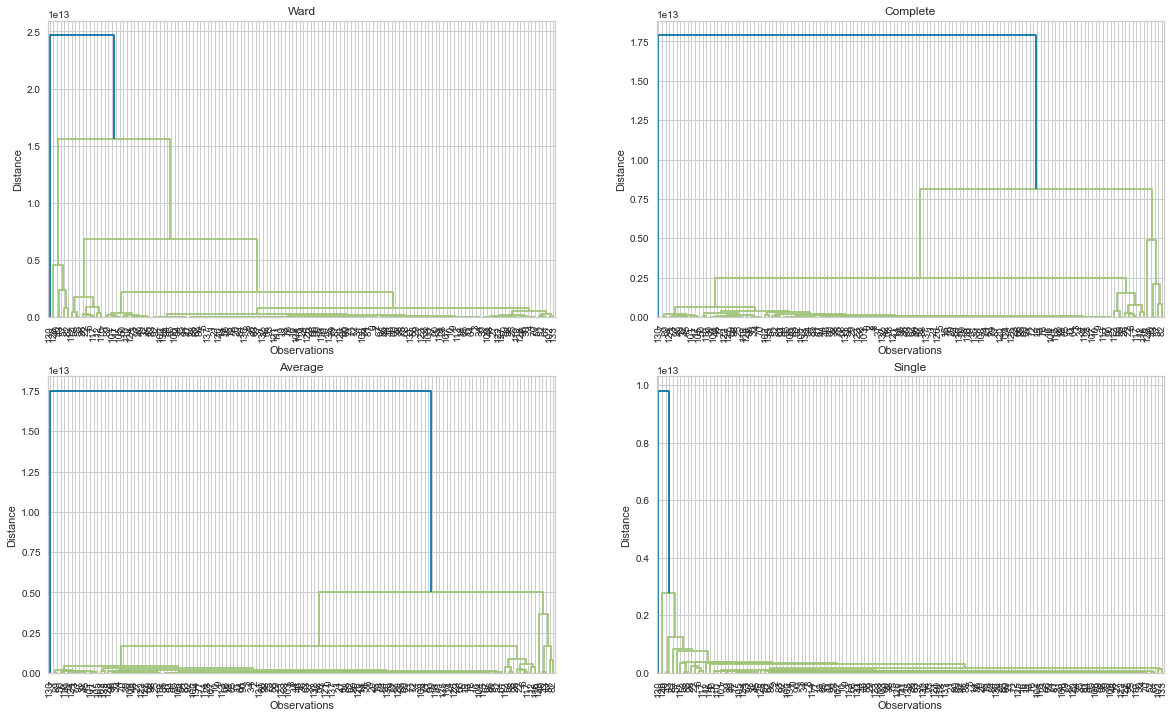

In [140]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

### Model Building and label visualisation

In [141]:
from sklearn.cluster import AgglomerativeClustering

In [158]:
model_h = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward")
model_h.fit_predict(X)

array([2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 2,
       2, 2, 2, 2, 2, 2], dtype=int64)

In [160]:
df["cluster_h"].value_counts()

2    123
1      9
0      5
3      1
Name: cluster_h, dtype: int64

In [144]:
df["cluster_h"] = model_h.labels_

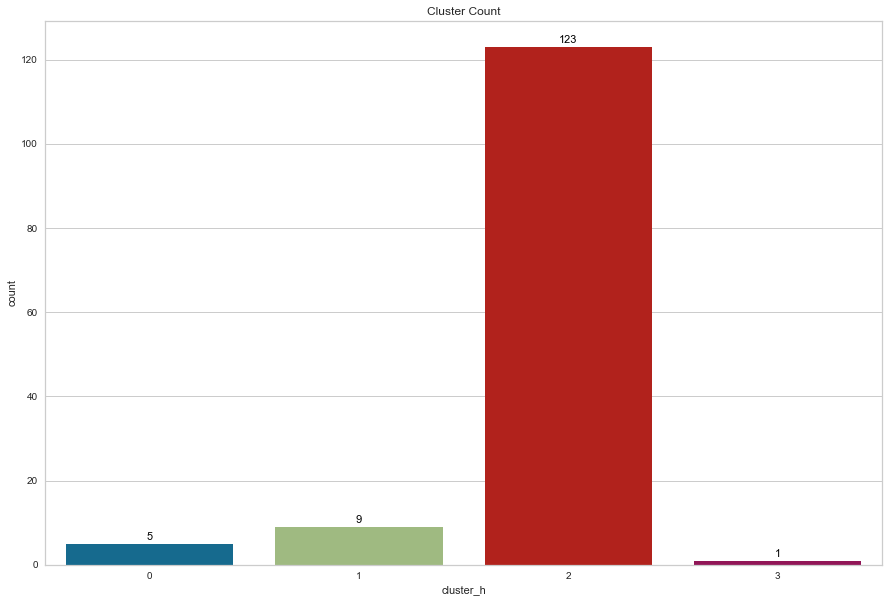

In [145]:
plt.figure(figsize=(15,10))
plt.title("Cluster Count")
ax1 = sns.countplot(x = df.cluster_h)

for p in ax1.patches:
    ax1.annotate(
        s=f"{p.get_height():1.0f}",
        xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
        xycoords='data',
        ha='center', 
        va='center', 
        fontsize=11, 
        color='black',
        xytext=(0,7), 
        textcoords='offset points',
        clip_on=True,                   # <---  important
    )
plt.show();

In [146]:
df[df["cluster_h"] == 0]

country  military_strength_power_index  aircraft_strength_value  \
40           France                          0.170                     1229   
43          Germany                          0.219                      712   
57            Japan                          0.150                     1561   
82      Netherlands                          0.592                      168   
129  United Kingdom                          0.172                      733   

     fighter/interceptor_strength_value  attack_aircraft_strength_value  \
40                                  269                               0   
43                                  128                              74   
57                                  279                              12   
82                                   61                               1   
129                                 133                              15   

     transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
40                                       121                           187   
43                                        71                            26   
57                                        60                           427   
82                                         4                            27   
129                                       44                           241   

     helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
40                               589                                      62   
43                               386                                      56   
57                               637                                     119   
82                                75                                      28   
129                              312                                      49   

     tank_strength_value  afv/apc_strength_value  \
40                   528                    6028   
43                   245                    4583   
57                  1004                    3130   
82                    18                    1546   
129                  227                    5000   

     self-propelled_artillery_strength_value  towed_artillery_strength_value  \
40                                       109                              12   
43                                       108                               0   
57                                       238                             500   
82                                        57                             160   
129                                       89                             126   

     rocket_projector_strength_value  navy_fleet_strengths_value  \
40                                13                     180.000   
43                                38                      80.000   
57                                99                     155.000   
82                                 0                      63.000   
129                               35                      88.000   

     aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
40                                   4.000                           9.000   
43                                   0.000                           6.000   
57                                   4.000                          20.000   
82                                   0.000                           4.000   
129                                  2.000                          10.000   

     destroyer_fleet_strength_value  frigate_fleet_strength_value  \
40                           11.000                        11.000   
43                            0.000                         9.000   
57                           40.000                         0.000   
82                            0.000                         6.000   
129                           6.000                        13.000   

     defense_spending_budget_value  external_debt

In [147]:
df[df["cluster_h"] == 1]

country  military_strength_power_index  aircraft_strength_value  \
6      Australia                          0.323                      464   
12       Belgium                          1.050                      148   
22        Canada                          0.371                      385   
26         China                          0.069                     3210   
53       Ireland                          1.948                       19   
55         Italy                          0.211                      860   
112        Spain                          0.339                      512   
116       Sweden                          0.530                      204   
117  Switzerland                          0.526                      169   

     fighter/interceptor_strength_value  attack_aircraft_strength_value  \
6                                    82                               6   
12                                   43                               0   
22                                   62                               0   
26                                 1232                             371   
53                                    0                               0   
55                                   99                             110   
112                                 137                              12   
116                                  71                               0   
117                                  54                               0   

     transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
6                                         38                           174   
12                                        12                            64   
22                                        38                           135   
26                                       224                           314   
53                                         0                             8   
55                                        38                           185   
112                                       46                           162   
116                                        6                            69   
117                                       18                            54   

     helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
6                                133                                      22   
12                                29                                       0   
22                               145                                       0   
26                               911                                     281   
53                                 8                                       0   
55                               439                                      59   
112                              162                                      19   
116                               53                                       0   
117                               42                                       0   

     tank_strength_value  afv/apc_strength_value  \
6                     59                    3051   
12                     0                     984   
22                    80                    1973   
26                  3500                   33000   
53                     0                     124   
55                   200                    6947   
112                  327                    2023   
116                  126                    1036   
117                  326                    1338   

     self-propelled_artillery_strength_value  towed_artillery_strength_value  \
6                                          0                              54   
12                                         0                               0   
22                                         0                             133   
26                                      3800                            36

In [148]:
df[df["cluster_h"] == 2]

country  military_strength_power_index  \
0                         Afghanistan                          1.344   
1                             Albania                          2.314   
2                             Algeria                          0.466   
3                              Angola                          0.838   
4                           Argentina                          0.652   
5                             Armenia                          2.125   
7                             Austria                          0.957   
8                          Azerbaijan                          0.946   
9                             Bahrain                          1.855   
10                         Bangladesh                          0.707   
11                            Belarus                          0.818   
13                             Bhutan                         10.168   
14                            Bolivia                          0.994   
15             Bosnia and Herzegovina                          3.859   
16                           Botswana                          2.058   
17                             Brazil                          0.199   
18                           Bulgaria                          0.892   
19                       Burkina Faso                          1.901   
20                           Cambodia                          2.056   
21                           Cameroon                          1.990   
23           Central African Republic                          3.289   
24                               Chad                          1.638   
25                              Chile                          0.767   
27                           Colombia                          0.605   
28                            Croatia                          1.018   
29                               Cuba                          1.221   
30                            Czechia                          0.553   
31   Democratic Republic of the Congo                          1.139   
32                            Denmark                          0.788   
33                 Dominican Republic                          2.750   
34                            Ecuador                          1.006   
35                              Egypt                          0.187   
36                        El Salvador                          3.129   
37                            Estonia                          2.589   
38                           Ethiopia                          0.858   
39                            Finland                          0.850   
41                              Gabon                          3.374   
42                            Georgia                          1.668   
44                              Ghana                          2.055   
45                             Greece                          0.531   
46                          Guatemala                          1.830   
47                           Honduras                          2.094   
48                            Hungary                          0.822   
49                              India                          0.095   
50                          Indonesia                          0.254   
51                               Iran                          0.219   
52                               Iraq                          0.791   
54                             Israel                          0.311   
56                        Ivory Coast                          2.024   
58                             Jordan                          1.144   
59                         Kazakhstan                          0.910   
60                              Kenya                          1.529   
61                             Kuwait                          1.570   
62                         Kyrgyzstan                          1.924   
63                               Laos                          3.443  

In [149]:
df[df["cluster_h"] == 3]

country  military_strength_power_index  aircraft_strength_value  \
130  United States                          0.061                    13264   

     fighter/interceptor_strength_value  attack_aircraft_strength_value  \
130                                2085                             715   

     transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
130                                      945                          2643   

     helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
130                             5768                                     967   

     tank_strength_value  afv/apc_strength_value  \
130                 6289                   39253   

     self-propelled_artillery_strength_value  towed_artillery_strength_value  \
130                                     1465                            2740   

     rocket_projector_strength_value  navy_fleet_strengths_value  \
130                             1366                     490.000   

     aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
130                                 20.000                          66.000   

     destroyer_fleet_strength_value  frigate_fleet_strength_value  \
130                          91.000                         0.000   

     defense_spending_budget_value  external_debt_value  airport_totals_value  \
130               750000000000.000   17910000000000.000                 13513   

     oil_production_value  oil_consumption_value  proven_oil_reserves_value  \
130           9352000.000           20000000.000            36520000000.000   

     available_manpower_value  total_population_value  predicted_clusters  \
130             144872845.000           329256465.000                   2   

     cluster  cluster_h  
130        2          3

### Evaluate 

In [150]:
print(f'Silhouette Score(n=4): {silhouette_score(X, df.cluster_h)}') 

Silhouette Score(n=4): 0.8529367641942477


In [173]:
df["military_power"] = df["cluster_h"].map({  0 : "low",
                                                            1 : "medium",
                                                            2 : "powerfull",
                                                            3 : "most_powerfull",
                                                         })

In [174]:
df.reset_index(inplace=True)

In [175]:
df["military_power"].value_counts()

powerfull         123
medium              9
low                 5
most_powerfull      1
Name: military_power, dtype: int64

In [176]:
df.groupby("military_power")["country"].unique()["low"]

array(['France', 'Germany', 'Japan', 'Netherlands', 'United Kingdom'],
      dtype=object)

In [177]:
df.groupby("military_power")["country"].unique()["medium"]

array(['Australia', 'Belgium', 'Canada', 'China', 'Ireland', 'Italy',
       'Spain', 'Sweden', 'Switzerland'], dtype=object)

In [178]:
df.groupby("military_power")["country"].unique()["powerfull"]

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Belarus', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Cambodia',
       'Cameroon', 'Central African Republic', 'Chad', 'Chile',
       'Colombia', 'Croatia', 'Cuba', 'Czechia',
       'Democratic Republic of the Congo', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Ethiopia', 'Finland', 'Gabon', 'Georgia', 'Ghana', 'Greece',
       'Guatemala', 'Honduras', 'Hungary', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Israel', 'Ivory Coast', 'Jordan', 'Kazakhstan', 'Kenya',
       'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Liberia',
       'Libya', 'Lithuania', 'Madagascar', 'Malaysia', 'Mali',
       'Mauritania', 'Mexico', 'Moldova', 'Mongolia', 'Montenegro',
       'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal',
       'N

In [179]:
df.groupby("military_power")["country"].unique()["most_powerfull"]

array(['United States'], dtype=object)